## Exporting required libraries

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.externals import joblib
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [171]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

## Reading and understanding the data¶

In [174]:
data0= pd.read_csv('telecom_churn_data.csv')
data0.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [175]:
data0.shape

(99999, 226)

In [176]:
data0.info(verbose= 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [177]:
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


## Data pre-processing

In [178]:
data0['mobile_number'].duplicated().any()

False

In [179]:
round(data0.isnull().sum()/ data0.shape[0], 2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              0.01
std_og_t2o_mou              0.01
loc_ic_t2o_mou              0.01
last_date_of_month_6        0.00
last_date_of_month_7        0.01
last_date_of_month_8        0.01
last_date_of_month_9        0.02
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.04
onnet_mou_7                 0.04
onnet_mou_8                 0.05
onnet_mou_9                 0.08
offnet_mou_6                0.04
offnet_mou_7                0.04
offnet_mou_8                0.05
offnet_mou_9                0.08
roam_ic_mou_6               0.04
roam_ic_mou_7               0.04
roam_ic_mou_8               0.05
roam_ic_mou_9               0.08
roam_og_mou_6               0.04
roam_og_mou_7               0.04
roam_og_mou_8               0.05
roam_og_mou_9               0.08
loc_og_t2t_mou_6            0.04
loc_og_t2t

## Missing Value Analysis (MCAR, MAR, MNAR)

In [180]:

check1= ((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.total_rech_data_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.av_rech_amt_data_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.max_rech_data_6.isnull()].index).all())

check2= ((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.total_rech_data_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.av_rech_amt_data_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.max_rech_data_7.isnull()].index).all())

check3= ((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.total_rech_data_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.av_rech_amt_data_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.max_rech_data_8.isnull()].index).all())

check4= ((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.total_rech_data_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.av_rech_amt_data_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.max_rech_data_9.isnull()].index).all())

if check1 & check2 & check3 & check4:
    print('Assumption is True, We can impute missing values in total_rech_data_*, av_rech_amt_data_*, max_rech_data_* columns \
          with 0 ')

Assumption is True, We can impute missing values in total_rech_data_*, av_rech_amt_data_*, max_rech_data_* columns           with 0 


In [181]:

cols1= ['total_rech_data_6', 'av_rech_amt_data_6', 'max_rech_data_6', 
                    'total_rech_data_7', 'av_rech_amt_data_7', 'max_rech_data_7', 
                    'total_rech_data_8', 'av_rech_amt_data_8', 'max_rech_data_8',
                    'total_rech_data_9', 'av_rech_amt_data_9', 'max_rech_data_9']

for col in cols1:
    data0[col].fillna(0, inplace= True)


data0[cols1].isna().sum()

total_rech_data_6     0
av_rech_amt_data_6    0
max_rech_data_6       0
total_rech_data_7     0
av_rech_amt_data_7    0
max_rech_data_7       0
total_rech_data_8     0
av_rech_amt_data_8    0
max_rech_data_8       0
total_rech_data_9     0
av_rech_amt_data_9    0
max_rech_data_9       0
dtype: int64

### Analysing missing values in arpu_2g_*, arpu_3g_*, count_rech_2g_*, count_rech_3g_*  and night_pck_user_*

In [182]:
data0.night_pck_user_6.value_counts(dropna= False)

NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [183]:

check1= ((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.arpu_2g_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.arpu_3g_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.night_pck_user_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.count_rech_2g_6.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.count_rech_3g_6.isnull()].index).all())

check2= ((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.arpu_2g_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.arpu_3g_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.night_pck_user_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.count_rech_2g_7.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.count_rech_3g_7.isnull()].index).all())

check3= ((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.arpu_2g_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.arpu_3g_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.night_pck_user_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.count_rech_2g_8.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.count_rech_3g_8.isnull()].index).all())

check4= ((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.arpu_2g_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.arpu_3g_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.night_pck_user_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.count_rech_2g_9.isnull()].index).all()) & \
((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.count_rech_3g_9.isnull()].index).all())


if check1 & check2 & check3 & check4:
    print('Assumption is True, We can impute missing values in arpu_*, night_pck_user_* columns with 0 ')

Assumption is True, We can impute missing values in arpu_*, night_pck_user_* columns with 0 


In [184]:

cols2= ['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'count_rech_2g_6', 'count_rech_3g_6',
       'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_8', 'count_rech_3g_8', 'count_rech_2g_9', 'count_rech_3g_9',]


for col in cols2:
    data0[col].fillna(0, inplace= True)


data0[cols2].isna().sum()

arpu_2g_6           0
arpu_2g_7           0
arpu_2g_8           0
arpu_2g_9           0
arpu_3g_6           0
arpu_3g_7           0
arpu_3g_8           0
arpu_3g_9           0
night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
count_rech_2g_6     0
count_rech_3g_6     0
count_rech_2g_7     0
count_rech_3g_7     0
count_rech_2g_8     0
count_rech_3g_8     0
count_rech_2g_9     0
count_rech_3g_9     0
dtype: int64

### Analysing missing values fb_user_* columns

In [185]:
data0.fb_user_6.value_counts(dropna= False)

NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [186]:

check1= ((data0[data0.date_of_last_rech_data_6.isnull()].index == data0[data0.fb_user_6.isnull()].index).all())
check2= ((data0[data0.date_of_last_rech_data_7.isnull()].index == data0[data0.fb_user_7.isnull()].index).all())
check3= ((data0[data0.date_of_last_rech_data_8.isnull()].index == data0[data0.fb_user_8.isnull()].index).all())
check4= ((data0[data0.date_of_last_rech_data_9.isnull()].index == data0[data0.fb_user_9.isnull()].index).all())

if check1 & check2 & check3 & check4:
    print('Assumption is True, We can impute missing values in fb_user_* columns with 0 ')

Assumption is True, We can impute missing values in fb_user_* columns with 0 


In [187]:

cols3= ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


for col in cols3:
    data0[col].fillna(0, inplace= True)


data0[cols3].isna().sum()

fb_user_6    0
fb_user_7    0
fb_user_8    0
fb_user_9    0
dtype: int64

In [188]:
 round(data0.isnull().sum()/ data0.shape[0], 2).sort_values(ascending= False)

date_of_last_rech_data_6    0.75
date_of_last_rech_data_7    0.74
date_of_last_rech_data_8    0.74
date_of_last_rech_data_9    0.74
std_ic_t2f_mou_9            0.08
std_ic_mou_9                0.08
std_ic_t2m_mou_9            0.08
loc_og_t2t_mou_9            0.08
loc_og_t2m_mou_9            0.08
loc_og_t2f_mou_9            0.08
loc_og_t2c_mou_9            0.08
std_ic_t2o_mou_9            0.08
loc_og_mou_9                0.08
std_og_t2t_mou_9            0.08
std_og_t2f_mou_9            0.08
og_others_9                 0.08
std_og_t2m_mou_9            0.08
roam_ic_mou_9               0.08
spl_ic_mou_9                0.08
std_og_t2c_mou_9            0.08
isd_ic_mou_9                0.08
std_og_mou_9                0.08
isd_og_mou_9                0.08
ic_others_9                 0.08
roam_og_mou_9               0.08
spl_og_mou_9                0.08
loc_ic_t2m_mou_9            0.08
onnet_mou_9                 0.08
loc_ic_mou_9                0.08
std_ic_t2t_mou_9            0.08
loc_ic_t2t

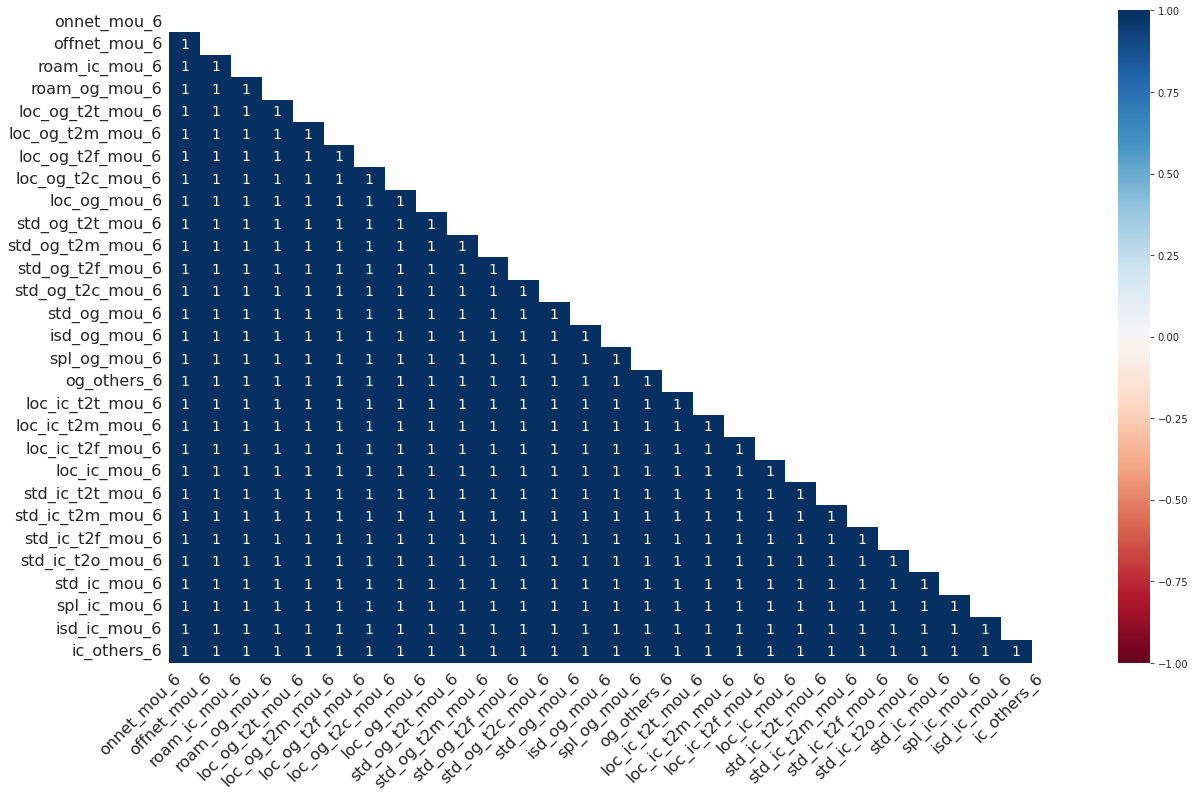

In [189]:
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_6', '_others_6', 'total_og_mou_6'))])

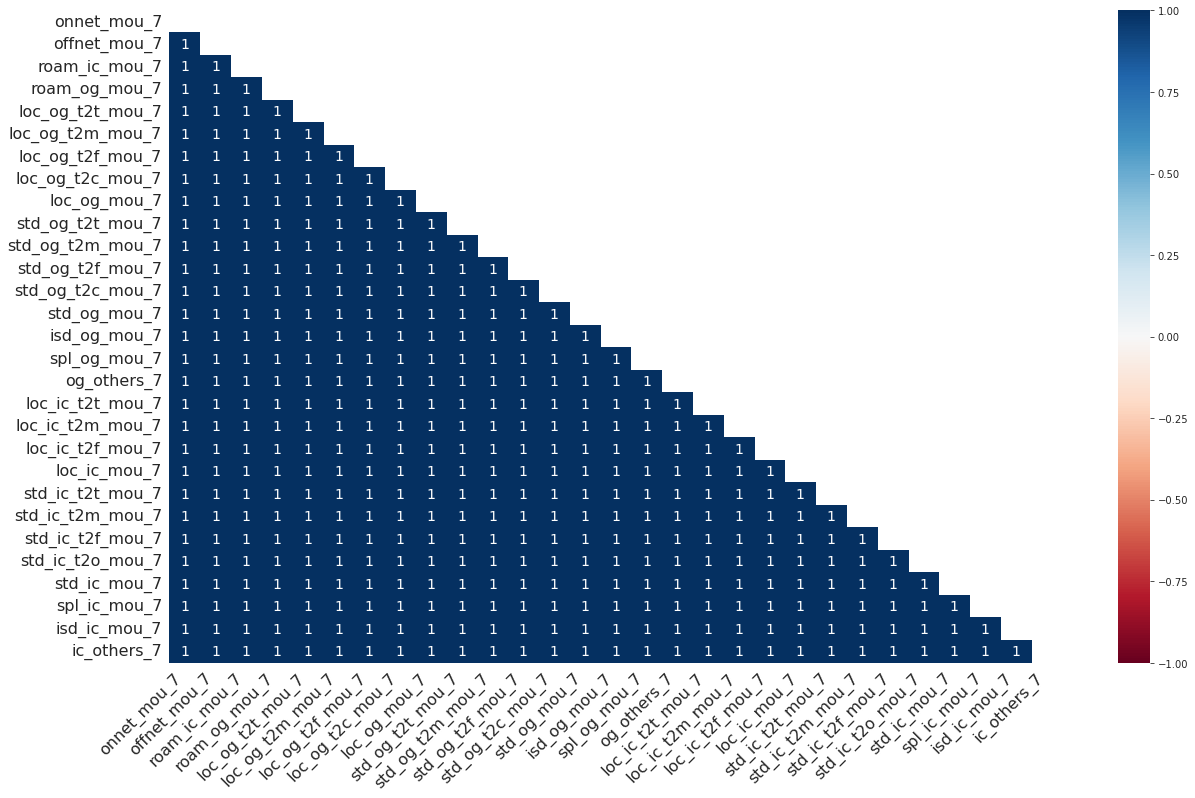

In [190]:
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_7', '_others_7'))])

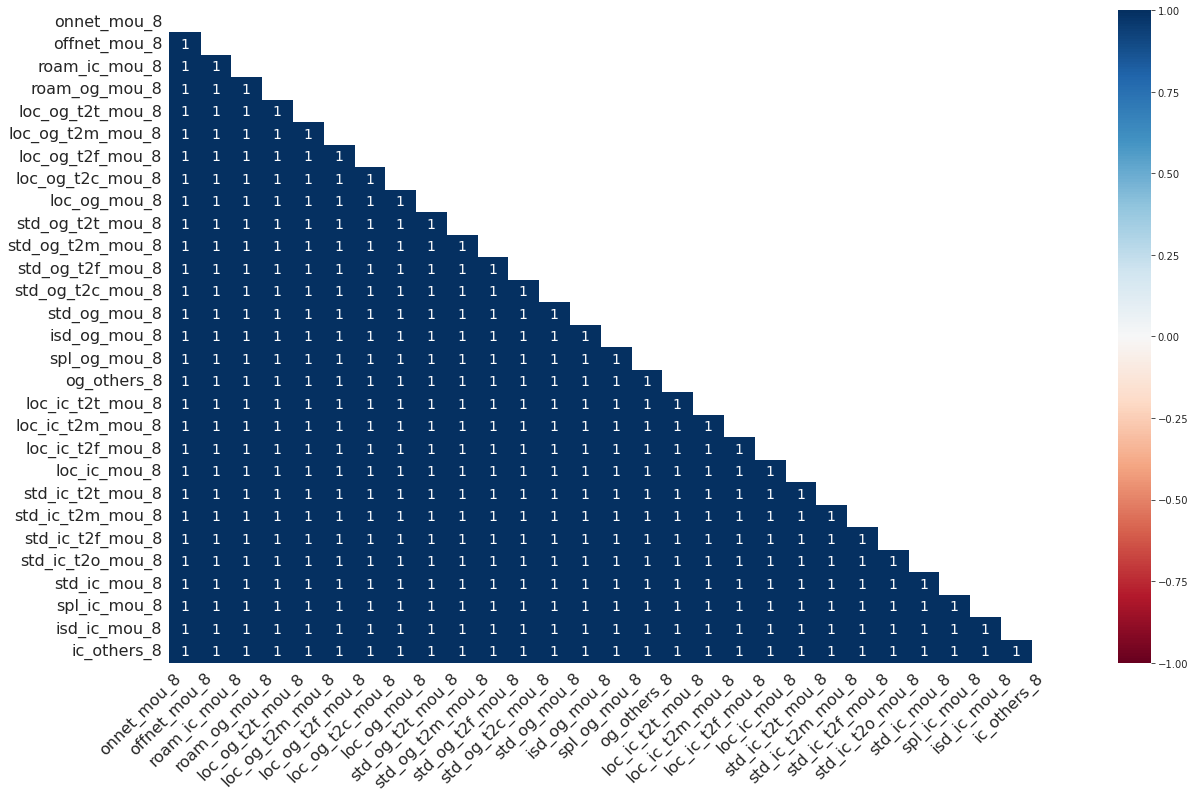

In [191]:
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_8', '_others_8'))])

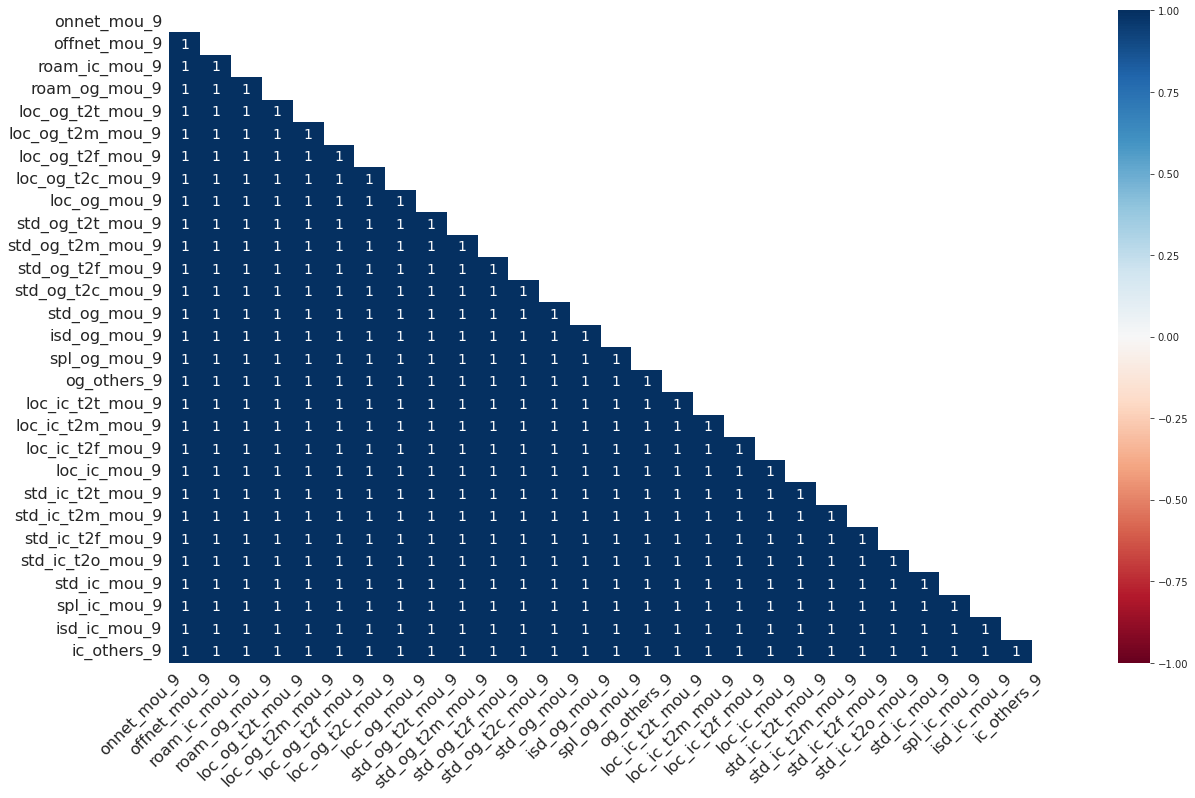

In [192]:
msno.heatmap(data0.loc[:, data0.columns.str.endswith(('mou_9', '_others_9'))])

In [193]:
ind6= data0[data0.onnet_mou_6.isna()].index
ind7= data0[data0.onnet_mou_7.isna()].index
ind8= data0[data0.onnet_mou_8.isna()].index
ind9= data0[data0.onnet_mou_9.isna()].index


print('Month 6 incoming calls for observations having missing mou data: ', *data0.loc[ind6, 'total_ic_mou_6'].unique())
print('Month 6 outgoing calls for observations having missing mou data: ', *data0.loc[ind6, 'total_og_mou_6'].unique())
print('Month 7 incoming calls for observations having missing mou data: ', *data0.loc[ind7, 'total_ic_mou_7'].unique())
print('Month 7 outgoing calls for observations having missing mou data: ', *data0.loc[ind7, 'total_og_mou_7'].unique())
print('Month 8 incoming calls for observations having missing mou data: ', *data0.loc[ind8, 'total_ic_mou_8'].unique())
print('Month 8 outgoing calls for observations having missing mou data: ', *data0.loc[ind8, 'total_og_mou_8'].unique())
print('Month 9 incoming calls for observations having missing mou data: ', *data0.loc[ind9, 'total_ic_mou_9'].unique())
print('Month 9 outgoing calls for observations having missing mou data: ', *data0.loc[ind9, 'total_og_mou_9'].unique())

Month 6 incoming calls for observations having missing mou data:  0.0
Month 6 outgoing calls for observations having missing mou data:  0.0
Month 7 incoming calls for observations having missing mou data:  0.0
Month 7 outgoing calls for observations having missing mou data:  0.0
Month 8 incoming calls for observations having missing mou data:  0.0
Month 8 outgoing calls for observations having missing mou data:  0.0
Month 9 incoming calls for observations having missing mou data:  0.0
Month 9 outgoing calls for observations having missing mou data:  0.0


In [194]:
mou_cols= data0.loc[:,data0.columns.str.endswith(('mou_6', 'mou_7', 'mou_8', '_others_6', '_others_7','_others_8', 'mou_9', '_others_9'))].columns
for col in mou_cols:
    data0[col].fillna(0, inplace= True)

data0.isna().sum().sort_values(ascending= False)

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_9    74077
date_of_last_rech_data_8    73660
date_of_last_rech_9          4760
date_of_last_rech_8          3622
date_of_last_rech_7          1767
last_date_of_month_9         1659
date_of_last_rech_6          1607
last_date_of_month_8         1100
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
spl_og_mou_7                    0
spl_og_mou_6                    0
sep_vbc_3g                      0
spl_og_mou_8                    0
spl_og_mou_9                    0
og_others_6                     0
isd_og_mou_8                    0
og_others_7                     0
isd_og_mou_9                    0
std_og_mou_8                    0
isd_og_mou_7                    0
isd_og_mou_6                    0
std_og_mou_9                    0
og_others_9                     0
std_og_mou_7                    0
std_og_mou_6  

## Dropping unnecessary columns

In [195]:
print(data0.loc_og_t2o_mou.value_counts(dropna= False))
print(data0.std_og_t2o_mou.value_counts(dropna= False))
print(data0.loc_ic_t2o_mou.value_counts(dropna= False))

0.0    98981
NaN     1018
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
NaN     1018
Name: std_og_t2o_mou, dtype: int64
0.0    98981
NaN     1018
Name: loc_ic_t2o_mou, dtype: int64


In [196]:
data0.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

In [197]:
data0.drop('mobile_number', axis= 1, inplace= True)

In [198]:
print('Shape before dropping:', data0.shape)
data0= data0.loc[:, ~data0.columns.str.contains('date_of')]
print('Shape after dropping:', data0.shape)

data0.isna().sum().sort_values(ascending= False)

Shape before dropping: (99999, 222)
Shape after dropping: (99999, 210)


sep_vbc_3g            0
std_og_t2f_mou_9      0
total_og_mou_9        0
total_og_mou_8        0
total_og_mou_7        0
total_og_mou_6        0
og_others_9           0
og_others_8           0
og_others_7           0
og_others_6           0
spl_og_mou_9          0
spl_og_mou_8          0
spl_og_mou_7          0
spl_og_mou_6          0
isd_og_mou_9          0
isd_og_mou_8          0
isd_og_mou_7          0
isd_og_mou_6          0
std_og_mou_9          0
std_og_mou_8          0
std_og_mou_7          0
std_og_mou_6          0
std_og_t2c_mou_9      0
std_og_t2c_mou_8      0
std_og_t2c_mou_7      0
loc_ic_t2t_mou_6      0
loc_ic_t2t_mou_7      0
loc_ic_t2t_mou_8      0
loc_ic_mou_9          0
std_ic_t2f_mou_7      0
std_ic_t2f_mou_6      0
std_ic_t2m_mou_9      0
std_ic_t2m_mou_8      0
std_ic_t2m_mou_7      0
std_ic_t2m_mou_6      0
std_ic_t2t_mou_9      0
std_ic_t2t_mou_8      0
std_ic_t2t_mou_7      0
std_ic_t2t_mou_6      0
loc_ic_mou_8          0
loc_ic_t2t_mou_9      0
loc_ic_mou_7    

## Renaming columns and changing data types

In [199]:
# Columns not having _<month no.> as suffix
data0.loc[:,~ data0.columns.str.endswith(('_6','_7','_8', '_9'))].columns

Index(['circle_id', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [200]:
# Renaming the columns
data0.rename(columns= {'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace= True)

In [201]:
# Changing to integer from float
cat_col= ['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8']
data0[cat_col]= data0[cat_col].astype('int')

In [202]:
data1= data0.copy()

## Feature Engineering

In [203]:
# Calculating total recharge amount for data in each month and dropping original columns

data1['total_rech_amt_data_6']= data1.total_rech_data_6 * data1.av_rech_amt_data_6
data1['total_rech_amt_data_7']= data1.total_rech_data_7 * data1.av_rech_amt_data_7
data1['total_rech_amt_data_8']= data1.total_rech_data_8 * data1.av_rech_amt_data_8
data1['total_rech_amt_data_9']= data1.total_rech_data_9 * data1.av_rech_amt_data_9

print('Shape before dropping:', data1.shape)

data1.drop(['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7', 'av_rech_amt_data_7',
           'total_rech_data_8', 'av_rech_amt_data_8', 'total_rech_data_9', 'av_rech_amt_data_9'], axis= 1, inplace= True)

print('Shape after dropping:', data1.shape)

Shape before dropping: (99999, 214)
Shape after dropping: (99999, 206)


In [204]:
# Adding ARPU of data (3g and 2g) and dropping original columns

data1['arpu_data_6']=  data1.arpu_2g_6 + data1.arpu_3g_6
data1['arpu_data_7']=  data1.arpu_2g_7 + data1.arpu_3g_7
data1['arpu_data_8']=  data1.arpu_2g_8 + data1.arpu_3g_8
data1['arpu_data_9']=  data1.arpu_2g_9 + data1.arpu_3g_9

print('Shape before dropping:', data1.shape)
data1.drop(['arpu_2g_6', 'arpu_3g_6', 'arpu_2g_7', 'arpu_3g_7',
           'arpu_2g_8', 'arpu_3g_8', 'arpu_2g_9', 'arpu_3g_9'], axis= 1, inplace= True)
print('Shape after dropping:', data1.shape)

Shape before dropping: (99999, 210)
Shape after dropping: (99999, 202)


In [205]:
# Calculating average recharge amount for month 6 and 7 combined
data1['avg_rech_amt_6_7']= (data1.total_rech_amt_data_6 + data1.total_rech_amt_data_7 + 
                            data1.total_rech_amt_6 + data1.total_rech_amt_7)/2

## Identifying high-value customers

In [206]:
# Taking top 70 percentile customers as High Value customers
data_hvc= data1[data1.avg_rech_amt_6_7 > np.percentile(data1['avg_rech_amt_6_7'], 70)]

# Checking shape
data_hvc.shape

(29953, 203)

## Tagging churners

In [207]:
# Creating churn column and updating value of churn with 1 for the customers having no voice /data usage in month 9
data_hvc['churn']= 0
data_hvc.loc[(data_hvc.total_ic_mou_9== 0) & (data_hvc.total_og_mou_9== 0) & (data_hvc.vol_2g_mb_9== 0) & (data_hvc.vol_3g_mb_9== 0), 'churn']= 1
data_hvc.churn.value_counts(dropna= True, normalize= True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

In [208]:
# Channging data type of churn column
data_hvc['churn']= data_hvc.churn.astype('int')

In [209]:
# Now droping columns belong to month 9
col_9= data_hvc.loc[:, data_hvc.columns.str.endswith('_9')].columns
print('Shape before dropping:', data_hvc.shape)
data_hvc.drop(col_9, axis= 1, inplace= True)
print('Shape after dropping:', data_hvc.shape)

Shape before dropping: (29953, 204)
Shape after dropping: (29953, 154)


## Dropping columns having zero variance

In [210]:
### Droping Columns having zero variance
var_t= VarianceThreshold(threshold= 0)
variance_thresh= var_t.fit(data_hvc)
col_ind= var_t.get_support()

# Below data_hvc have zero variance
data_hvc.loc[:, ~col_ind].columns

Index(['circle_id', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')

In [211]:
# Dropping columns
data_hvc.drop(data_hvc.loc[:, ~col_ind].columns, axis= 1, inplace= True)
data_hvc.shape

(29953, 147)

# Exploratory Data Analysis

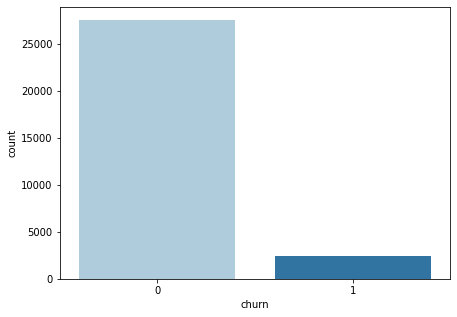

In [ ]:
# Checking churn data
plt.figure(figsize= [7,5])
sns.countplot(data_hvc.churn, palette= 'Paired', label=[1,0])
plt.show()

In [212]:
# columns to analyze
num_columns_to_analyze= ['total_rech_amt_data_6', 'arpu_data_6', 'arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'total_og_mou_6', 
                         'total_ic_mou_6', 'vol_2g_mb_6', 'vol_3g_mb_6','total_rech_amt_data_7', 'arpu_data_7', 'arpu_7', 
                         'onnet_mou_7', 'offnet_mou_7', 'total_og_mou_7', 'total_ic_mou_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 
                         'total_rech_amt_data_8', 'arpu_data_8', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'total_og_mou_8', 
                         'total_ic_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8','aon'
                        ]

char_columns_to_analyze= ['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8']

In [213]:
# Dividing the data into two dataframes
data_hvc_0= data_hvc[data_hvc.churn== 0]
print('Shape of data_hvc_0:', data_hvc_0.shape)
data_hvc_1= data_hvc[data_hvc.churn== 1]
print('Shape of data_hvc_1:', data_hvc_1.shape)

Shape of data_hvc_0: (27520, 147)
Shape of data_hvc_1: (2433, 147)


In [214]:
# Function for univariate analysis of categorical variables
def cat_univariate(app_df_new_0, app_df_new_1, col, fn_sup= 14, fn_s= 12, figsize= [20, 7], xtick_ro= 0):
    t0_col = float(len(app_df_new_0))
    t1_col = float(len(app_df_new_1))
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    f1_x_label= f'{col} for churn= 0'
    f2_x_label= f'{col} for churn= 1'
    ax1= fig.add_subplot(1,2,1)
    ax1.set_xticklabels(f1_x_label, rotation= xtick_ro, ha= 'right',  fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    ax2= fig.add_subplot(1,2,2)
    ax2.set_xticklabels(f2_x_label, rotation= xtick_ro, ha= 'right',  fontdict= {'fontsize': fn_s, 'color': 'Teal'})
    sup_t= f'Count plot for {col}'
    fig.suptitle(sup_t, fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    fig1= sns.countplot(data= app_df_new_0, x= col, ax= ax1, palette= 'Paired')
    fig2= sns.countplot(data= app_df_new_1, x= col, ax= ax2, palette= 'Paired_r')
    fig1.set_ylabel('Count', fontdict= {'fontsize': fn_s, 'color': 'Black'})
    fig1.set_xlabel(f1_x_label, fontdict= {'fontsize': fn_s, 'color': 'Black'})
    fig2.set_xlabel(f2_x_label, fontdict= {'fontsize': fn_s, 'color': 'Black'})
    for patch in fig1.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/t0_col)
        x= patch.get_x() + patch.get_width()
        y= patch.get_height()
        fig1.annotate(percentage, (patch.get_x() + patch.get_width() / 2.,
                patch.get_height()), ha= 'center', va= 'center', 
                xytext= (0, 5), textcoords= 'offset points', fontsize= 11, family= 'verdana')
        
    for patch2 in fig2.patches:
        percentage= '{:.1f}%'.format(100 * patch2.get_height()/t1_col)
        x= patch2.get_x() + patch2.get_width()
        y= patch2.get_height()
        fig2.annotate(percentage, (patch2.get_x() + patch2.get_width() / 2.,
                patch2.get_height()), ha= 'center', va= 'center', 
                xytext = (0, 5), textcoords= 'offset points', fontsize= 11, family='verdana')
    

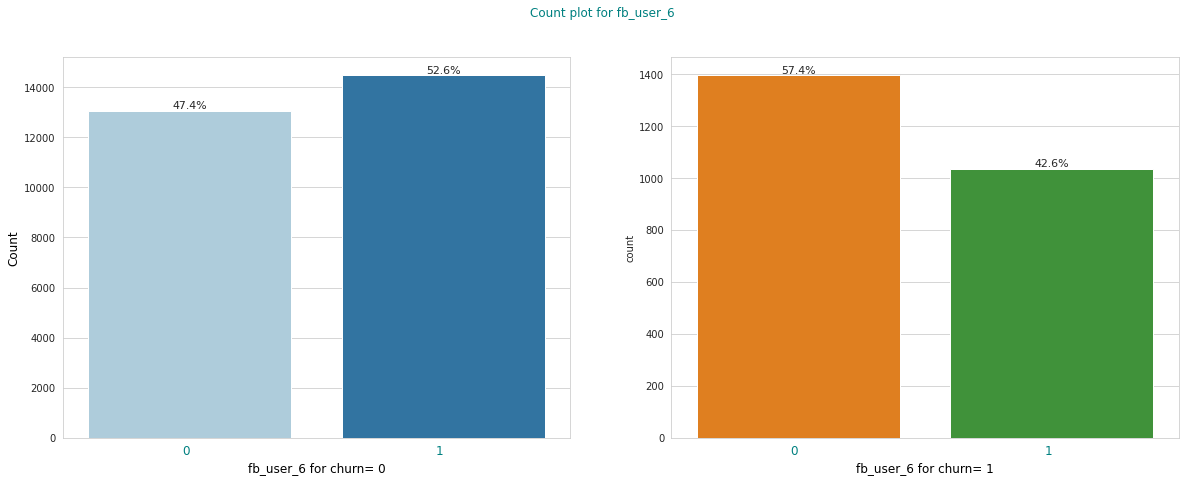

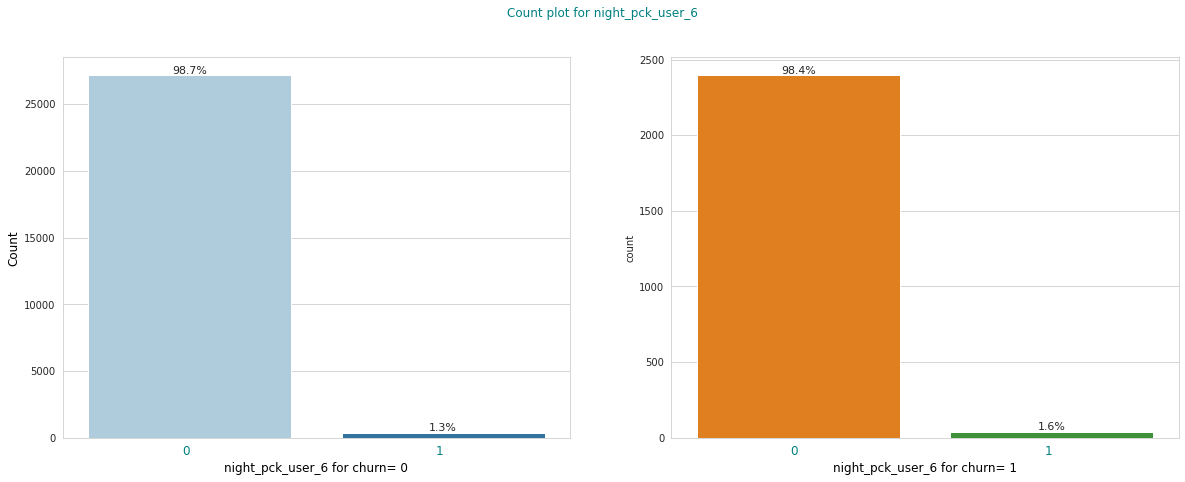

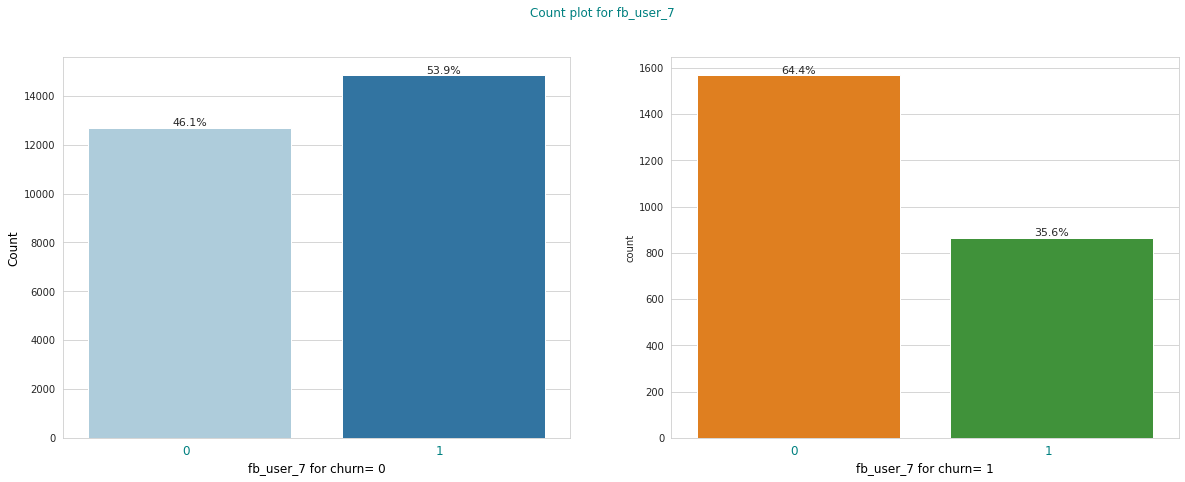

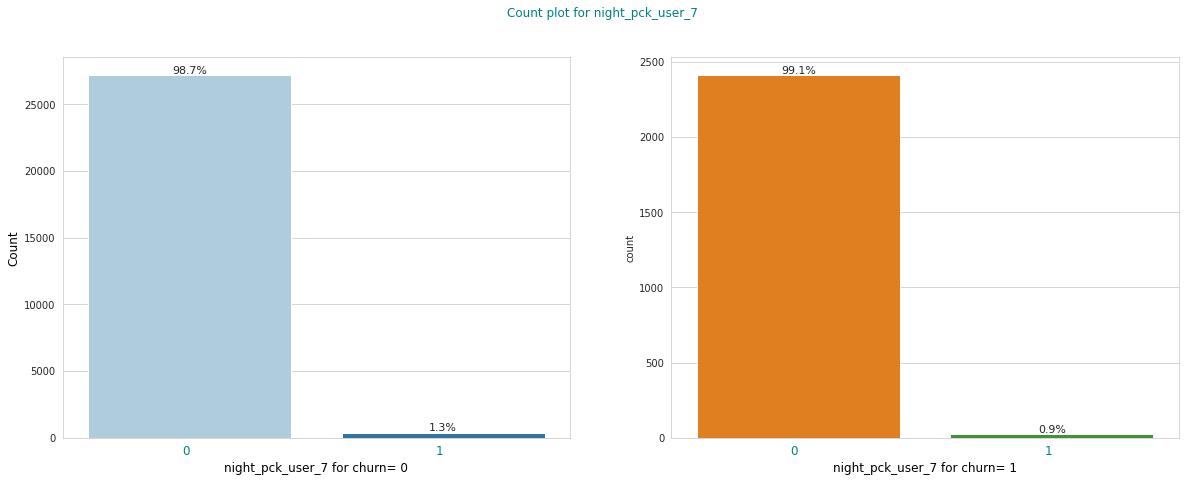

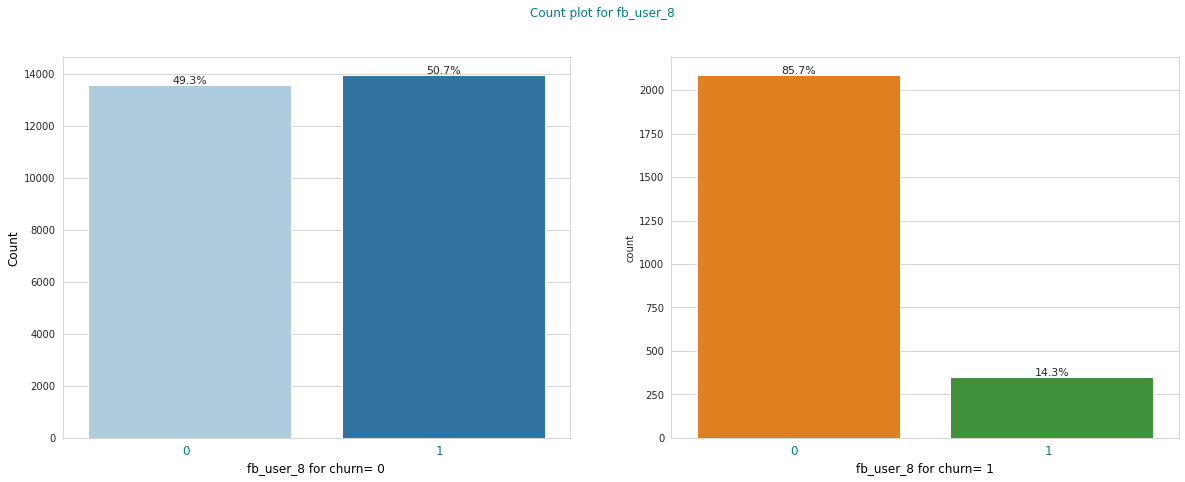

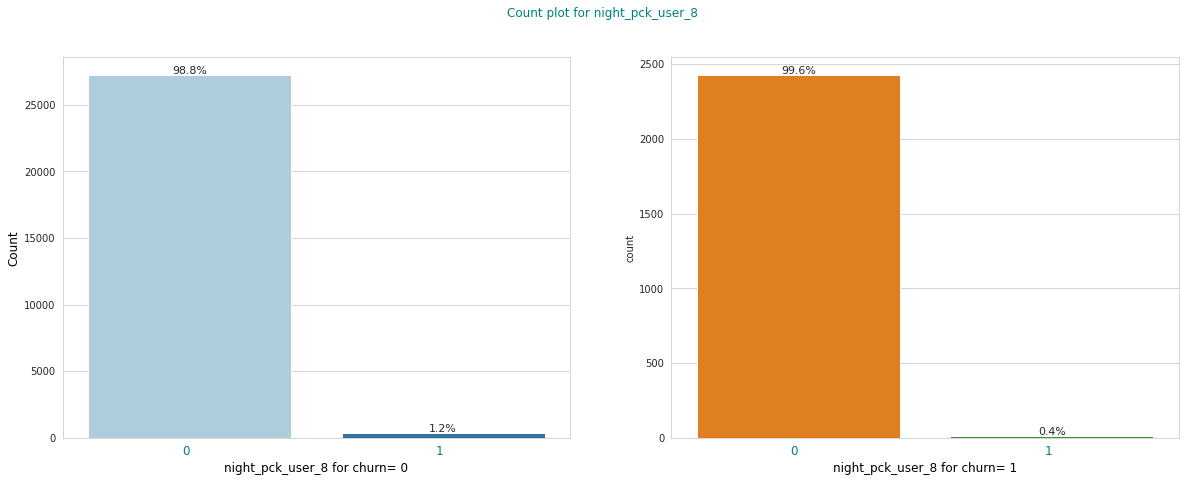

In [215]:
# Checking character columns
for col in char_columns_to_analyze:
    cat_univariate(app_df_new_0= data_hvc_0, app_df_new_1= data_hvc_1, col= col)

In [216]:
# Function to plot numeric columns distribution
def num_univariate(app_df_new_0, app_df_new_1, col, fn_sup= 14, fn_s= 12, figsize=[18, 7], xtick_ro= 0):
    sns.set_style("whitegrid")
    fig= plt.figure(figsize= figsize)
    sup_t= f'Density plot for {col}'
    fig.suptitle(sup_t, fontdict= {'fontsize': fn_sup, 'color': 'Teal'})
    sns.distplot(app_df_new_0[app_df_new_0[col].notna()][col], hist= False, label= 'Non-churn')
    sns.distplot(app_df_new_1[app_df_new_1[col].notna()][col], hist= False, label='Churn')

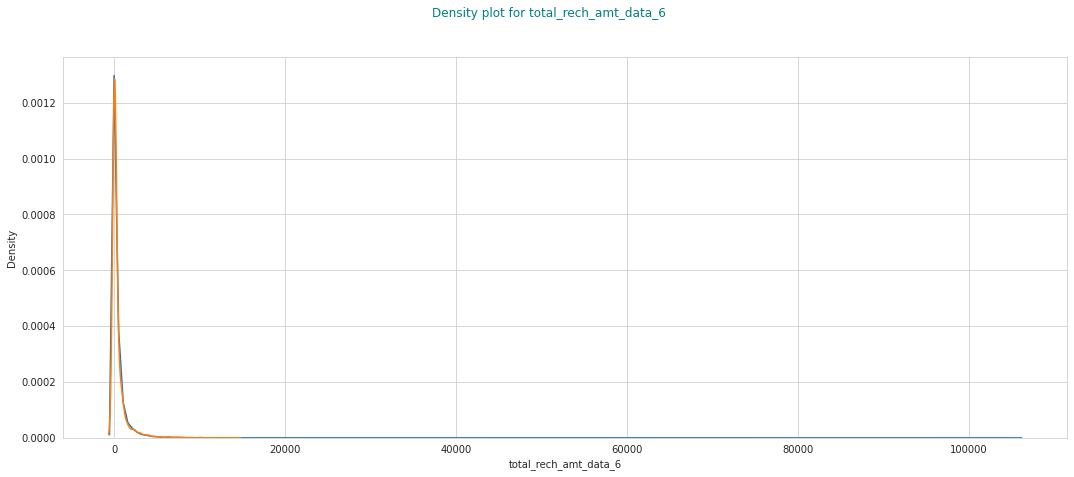

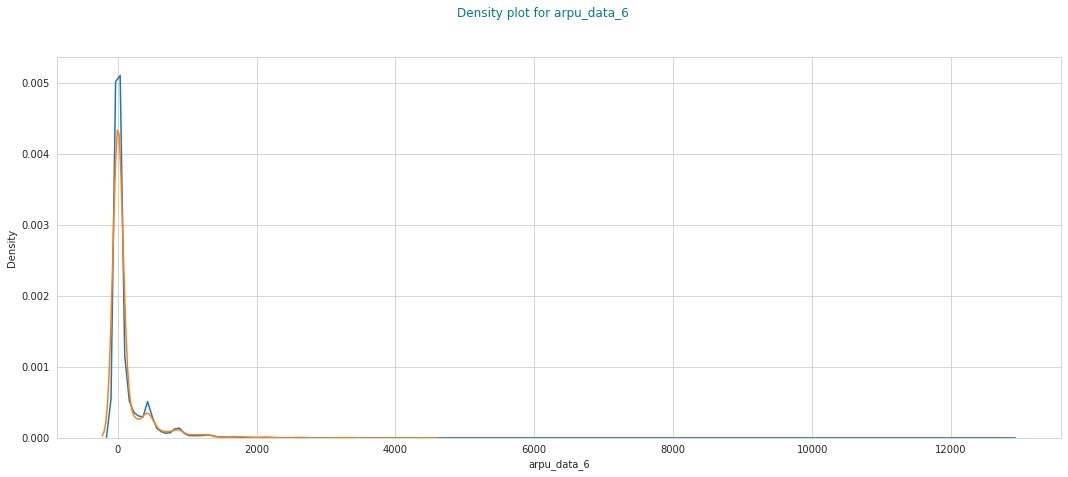

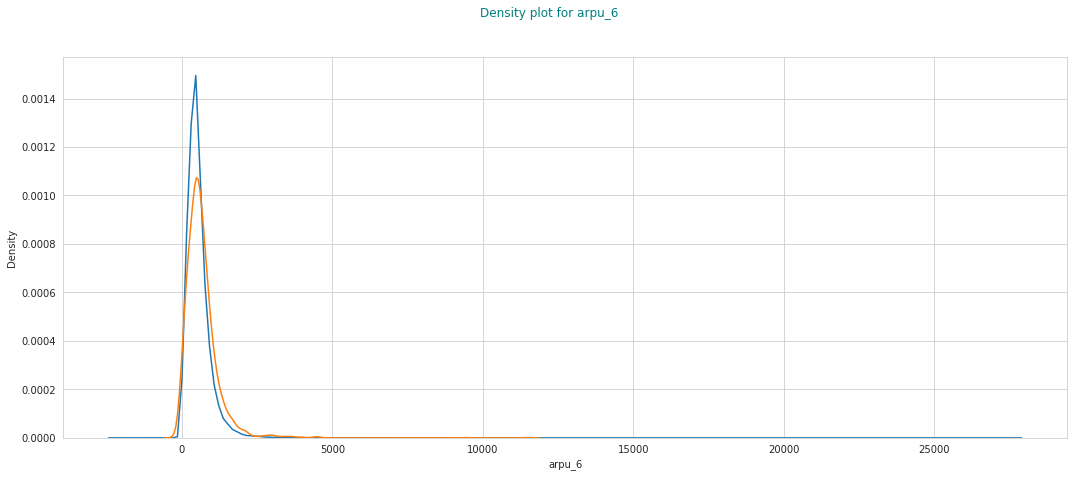

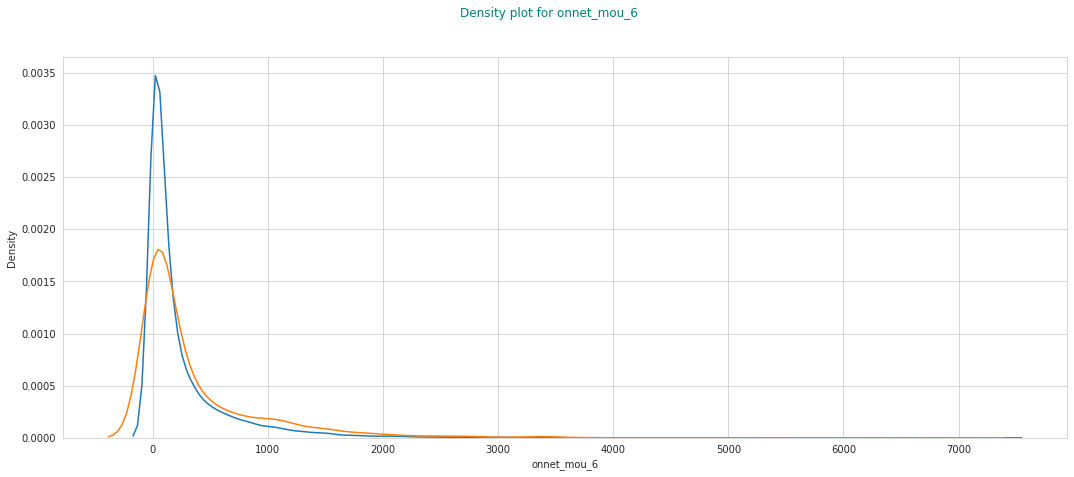

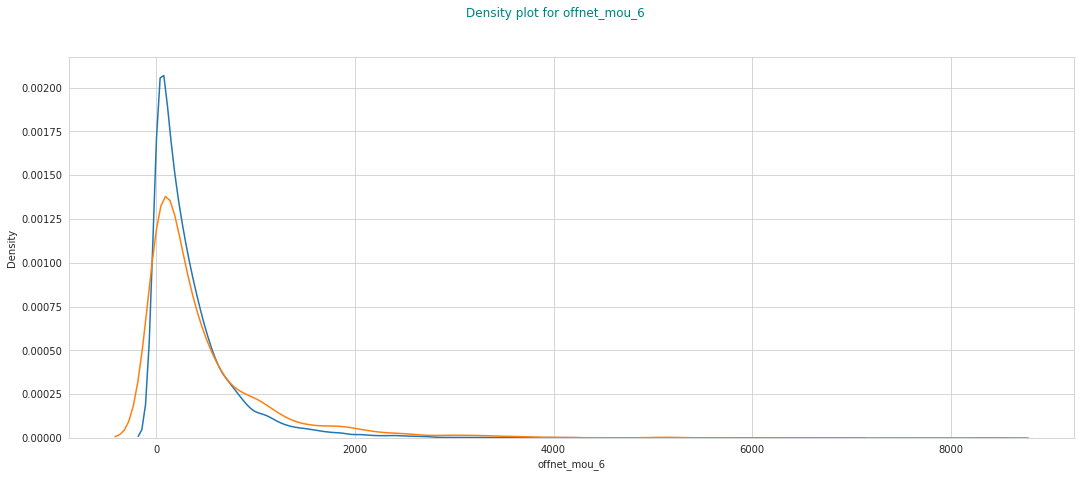

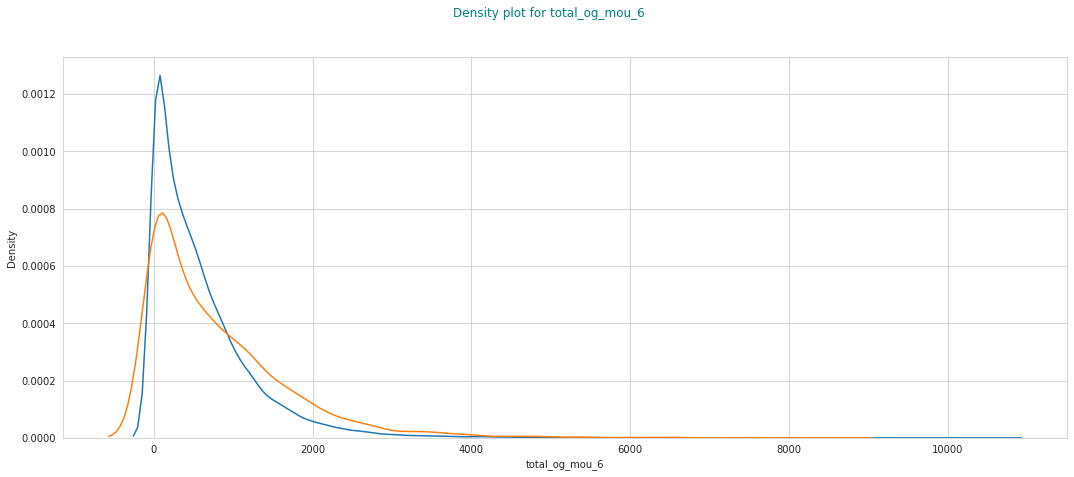

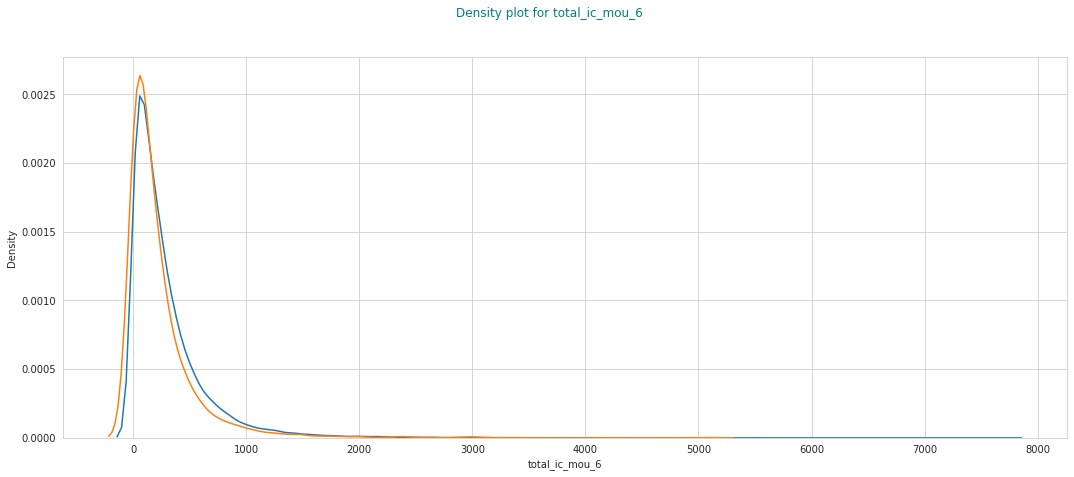

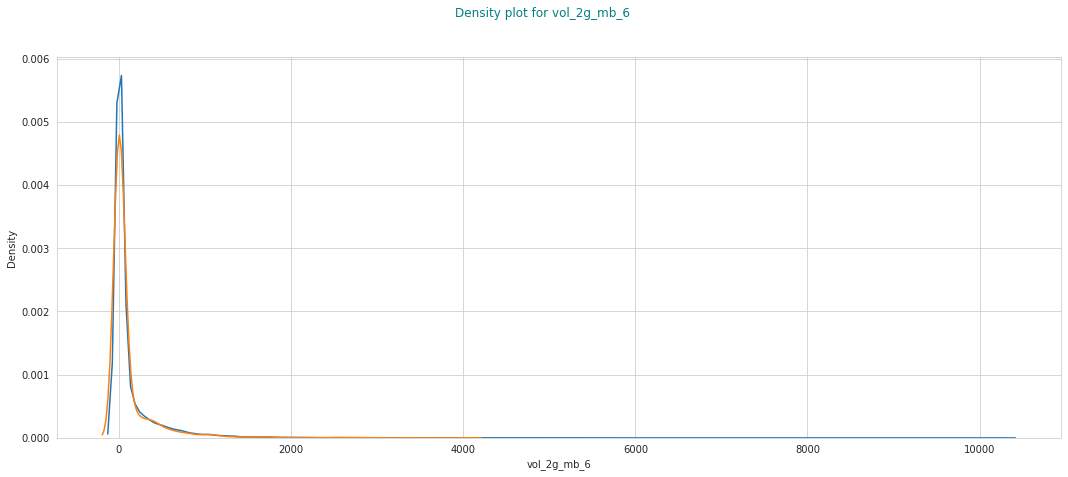

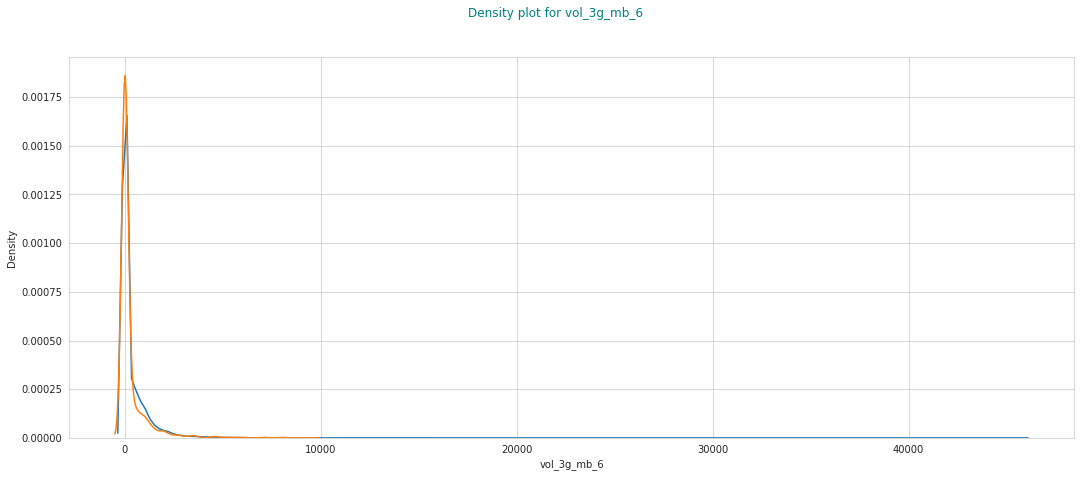

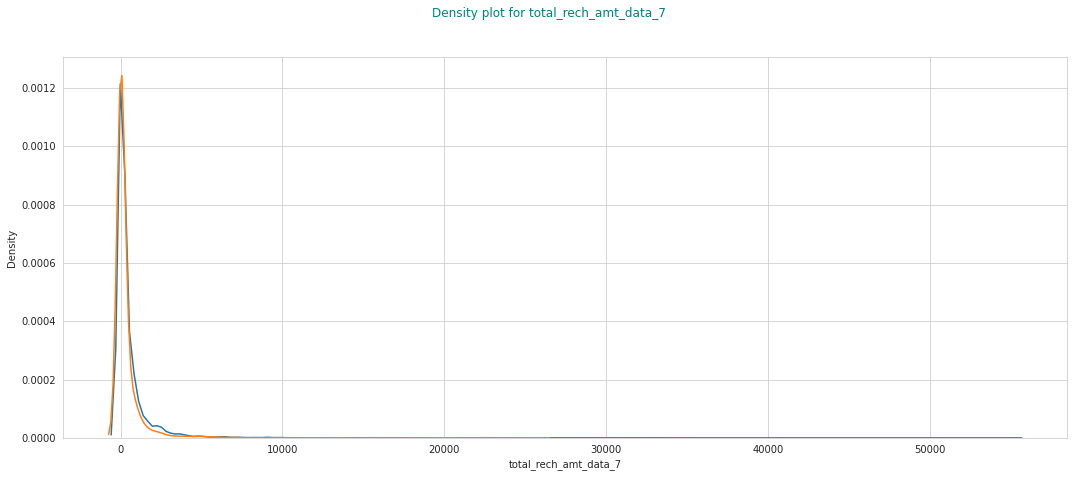

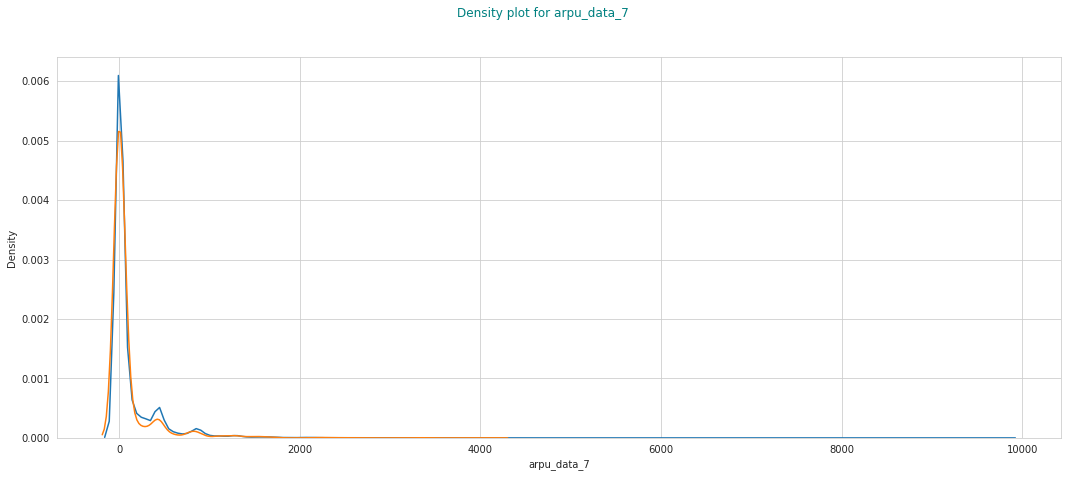

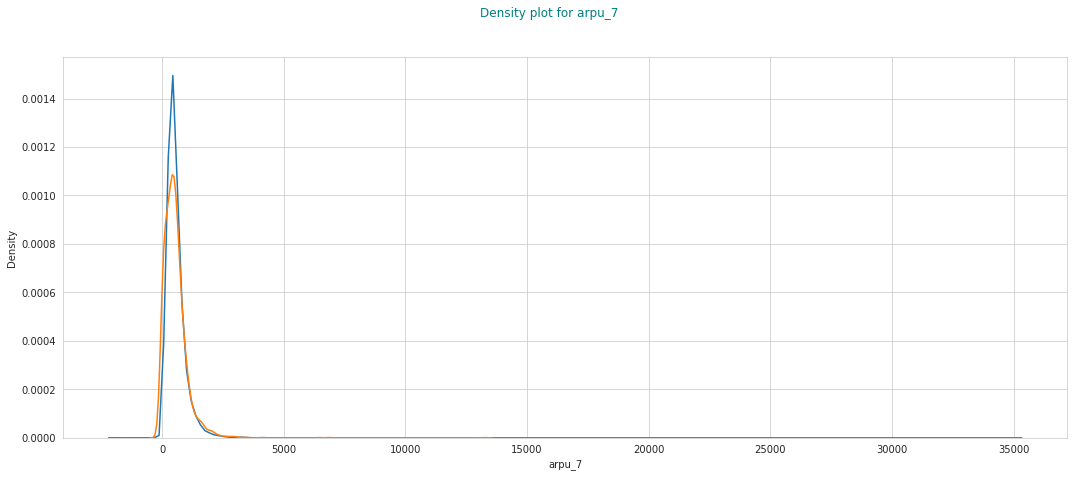

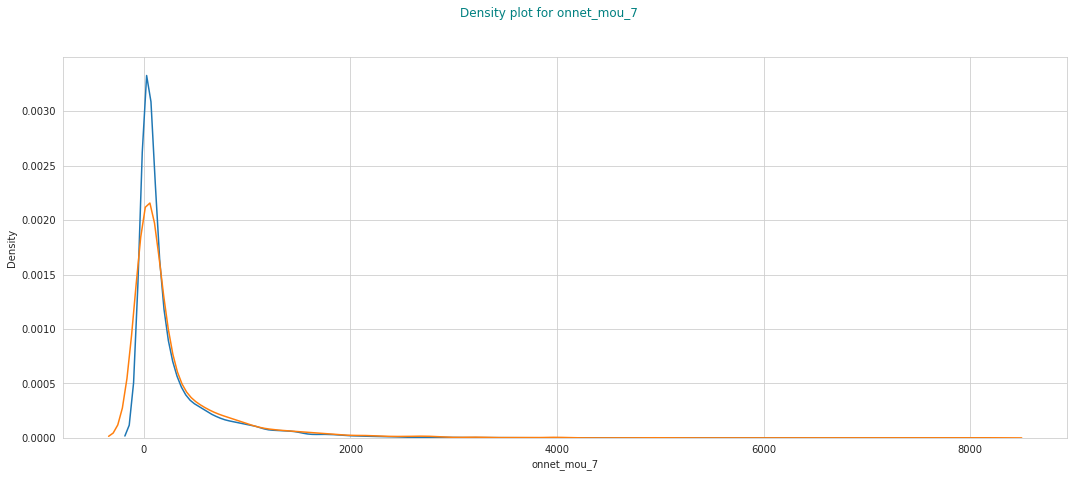

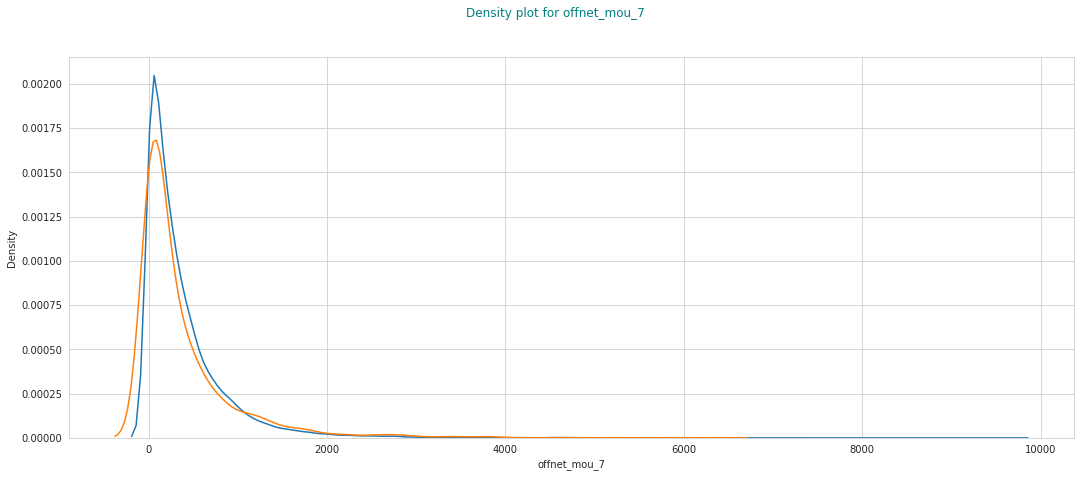

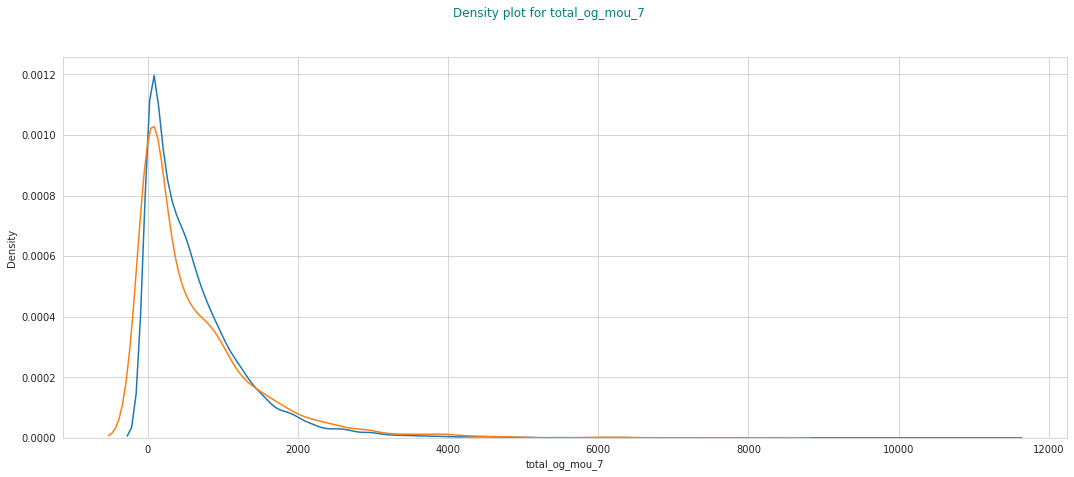

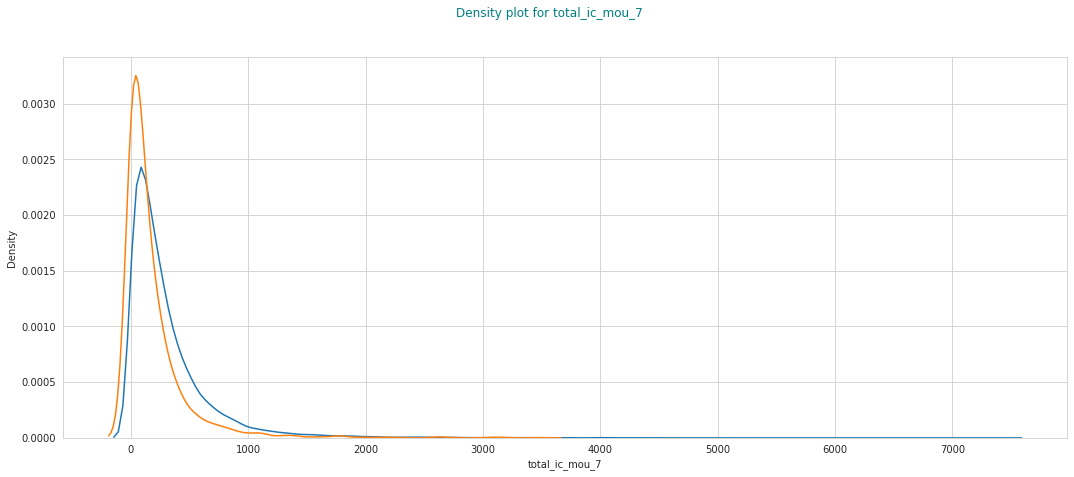

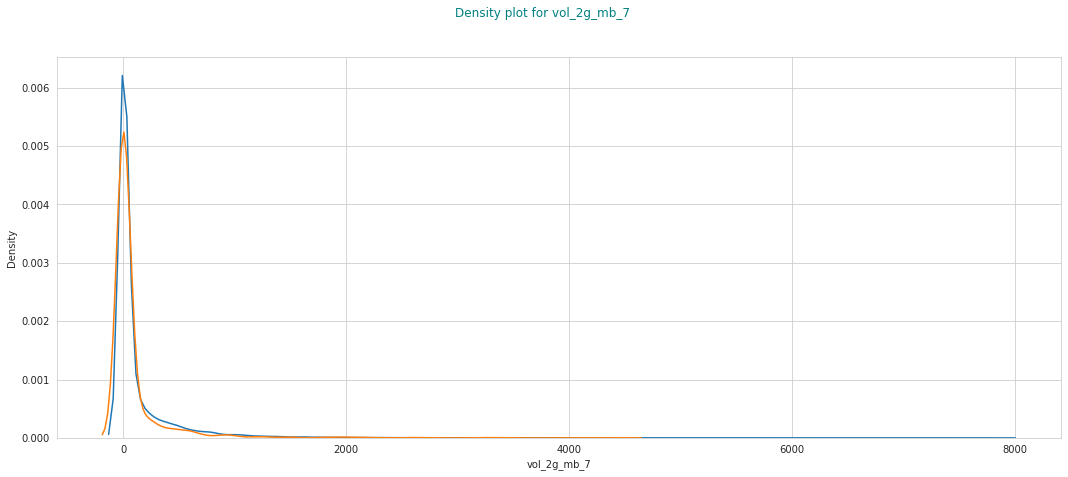

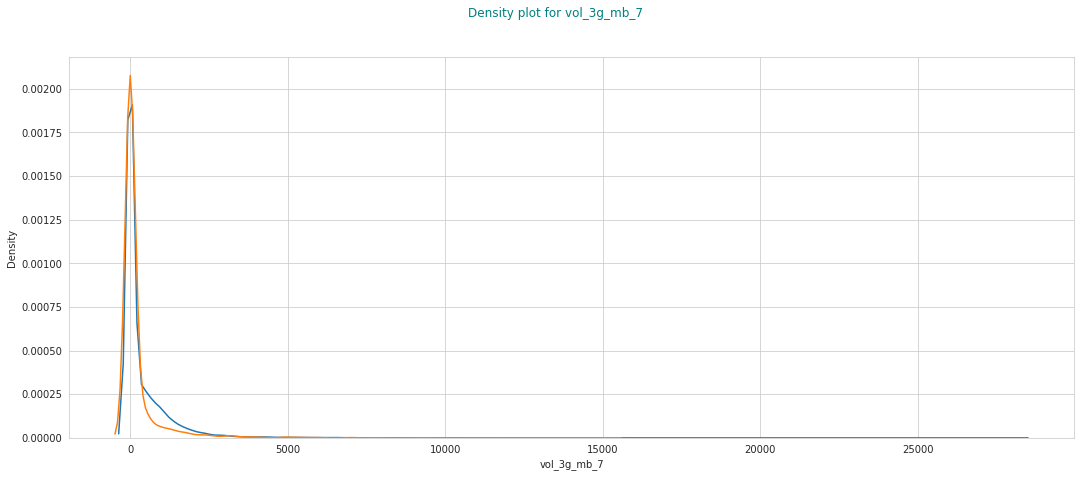

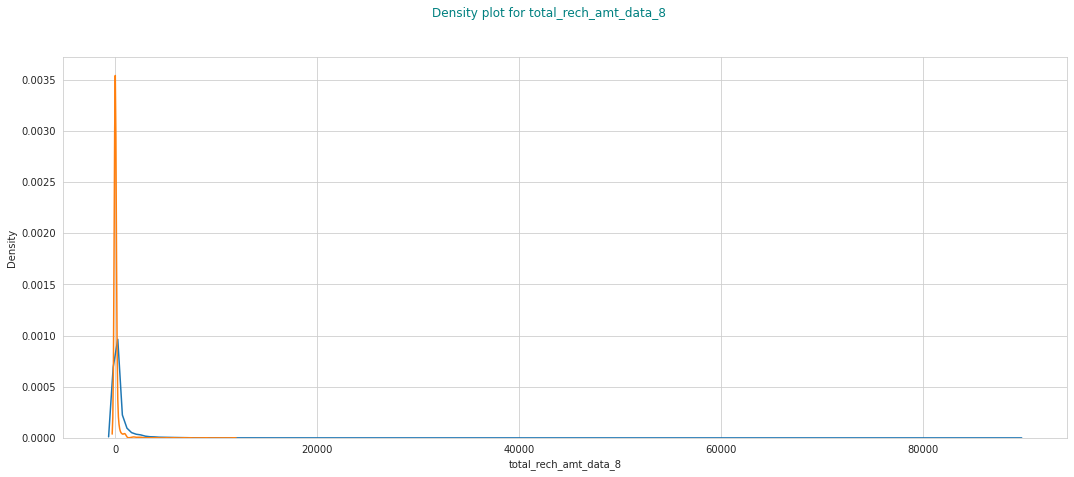

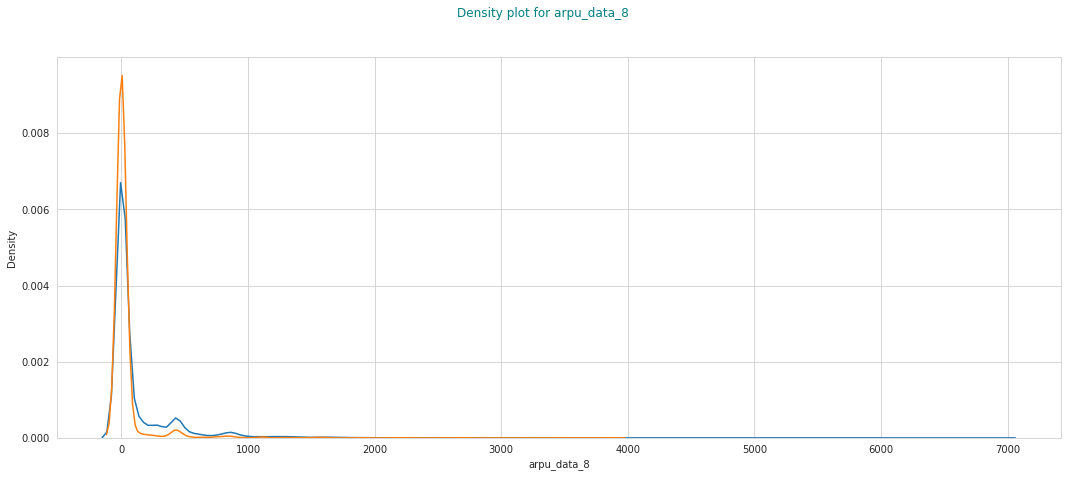

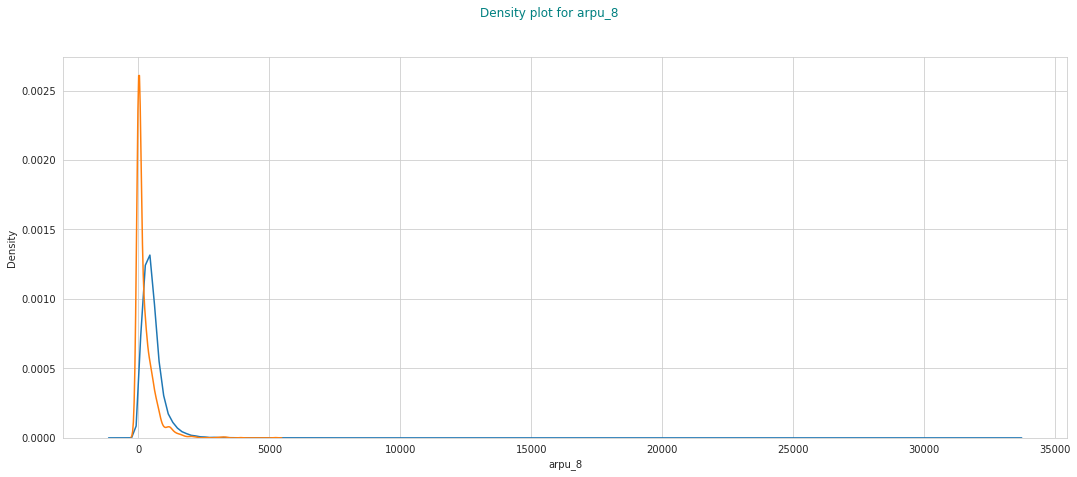

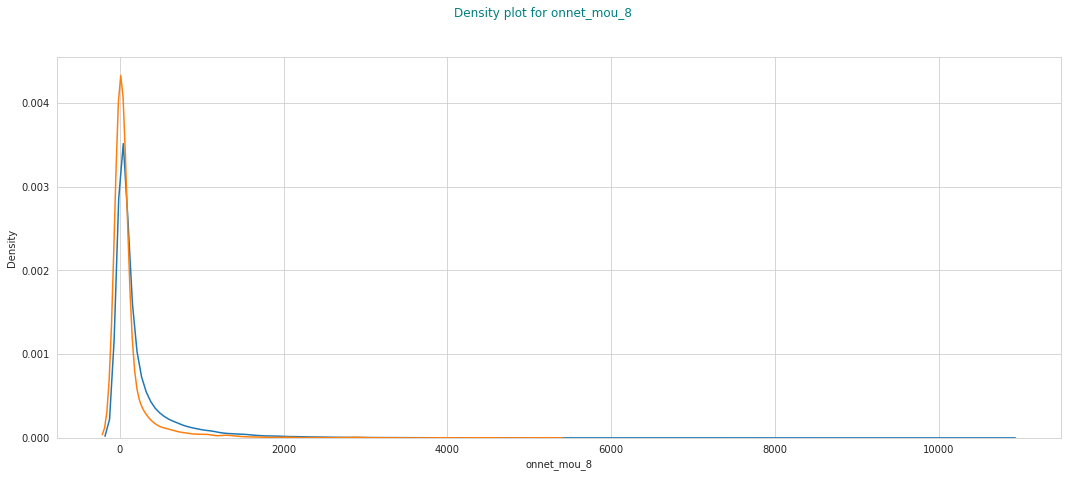

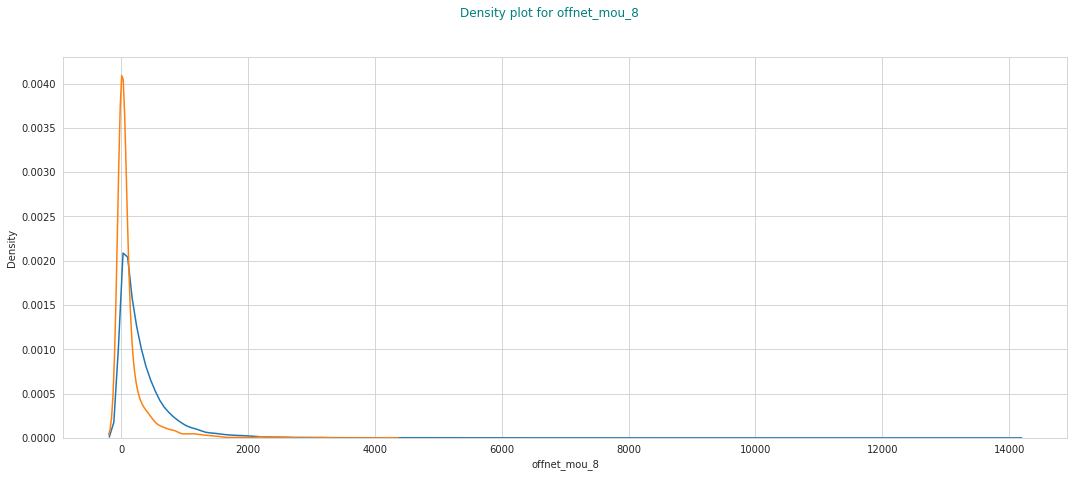

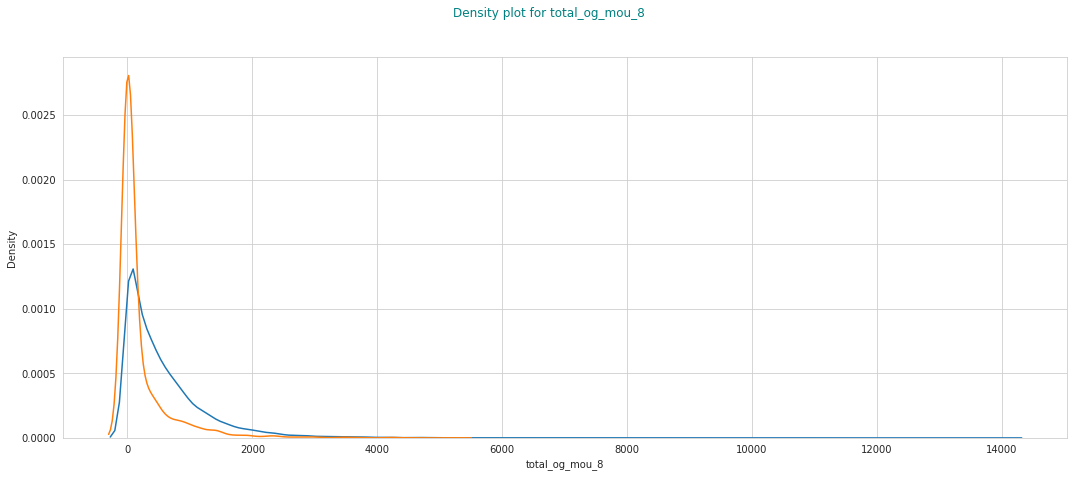

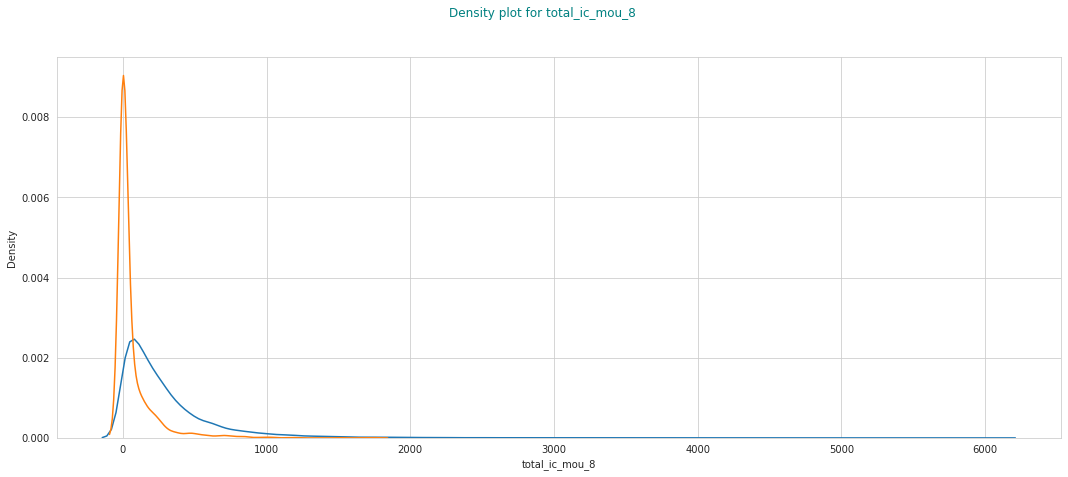

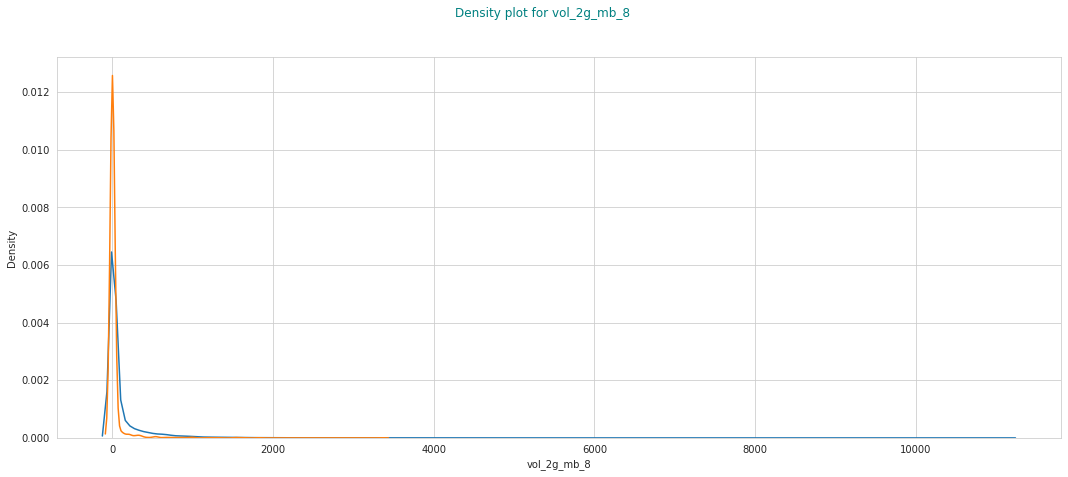

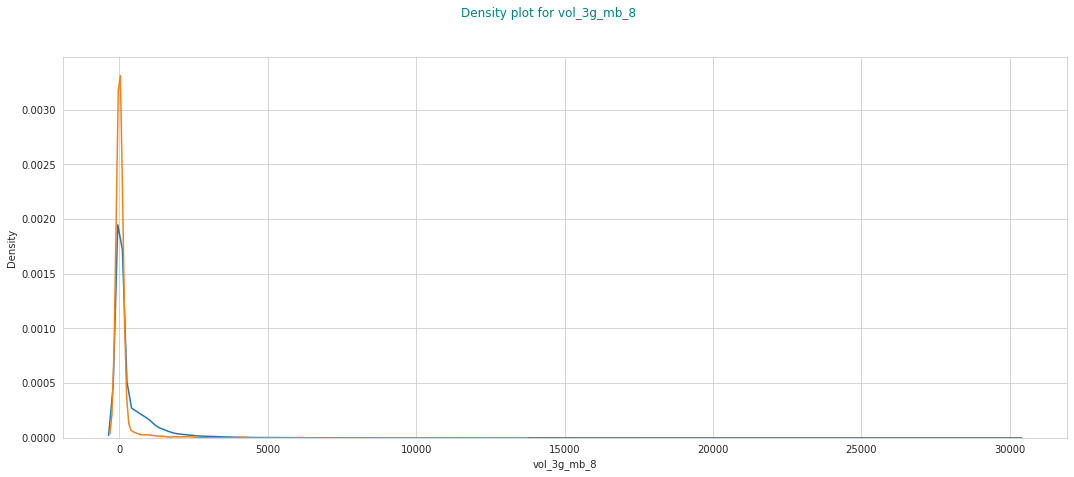

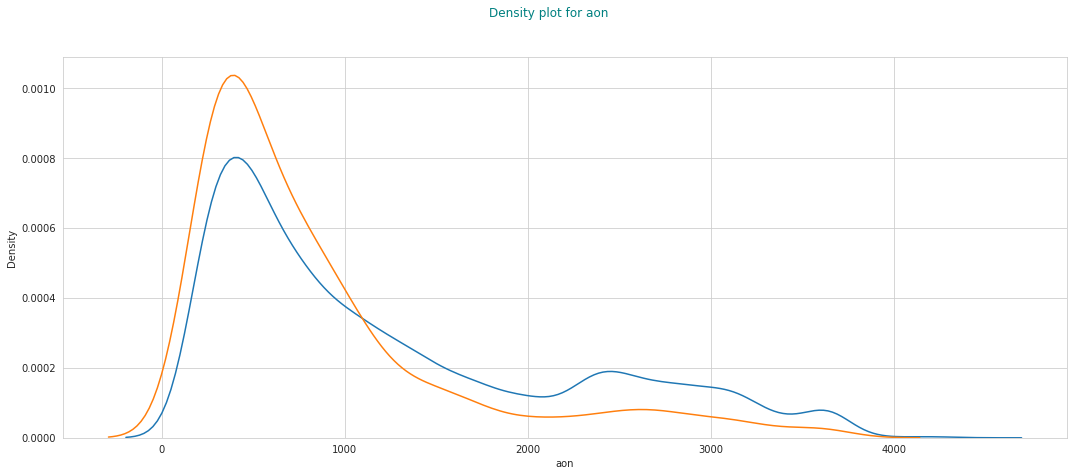

In [217]:
# Distplot of numeric columns
for col in num_columns_to_analyze:
    num_univariate(app_df_new_0= data_hvc_0, app_df_new_1= data_hvc_1, col= col)

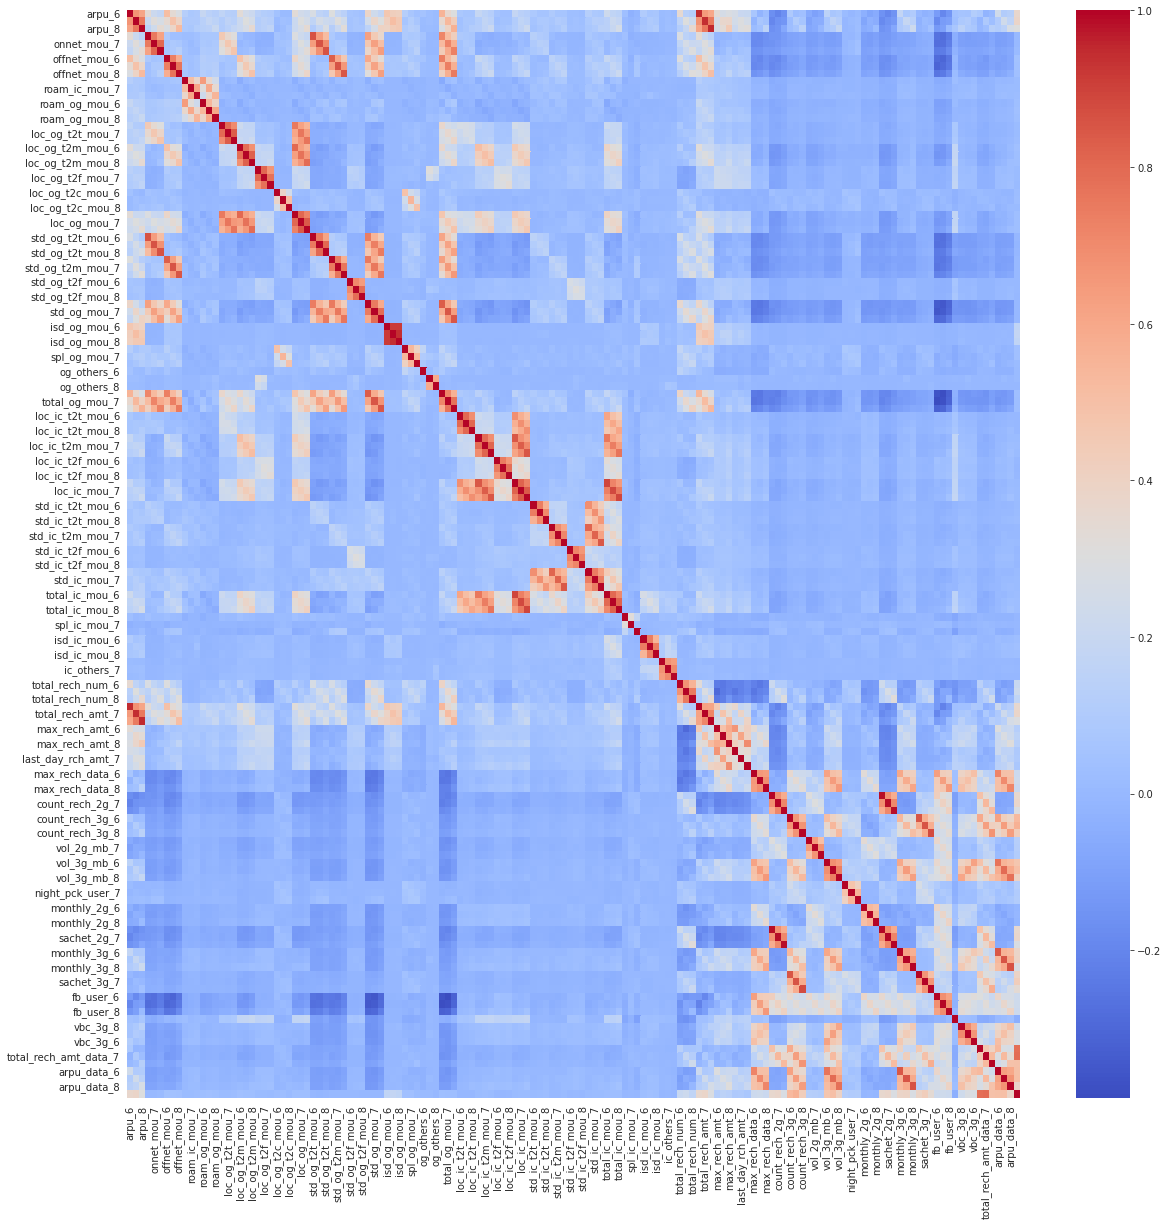

In [218]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))
sns.heatmap(data_hvc.drop('churn', axis=1).corr(), cmap= 'coolwarm')

In [219]:
# Finding top 100 High correlated features
a= data_hvc.corr()
corr_0= a.where(np.triu(np.ones(a.shape), k=1).astype(np.bool))
corr_0= corr_0.unstack().dropna()
corr_0= pd.DataFrame(corr_0).reset_index()
corr_0.columns= ['Var 1','Var 2','correlation']
corr_0['abs_correlation']= np.abs(corr_0['correlation'])
corr_0.sort_values('abs_correlation', ascending= False).head(100)

,Var 1,Var 2,correlation,abs_correlation
7857,sachet_2g_8,count_rech_2g_8,0.987175,0.987175
7732,sachet_2g_7,count_rech_2g_7,0.986423,0.986423
7608,sachet_2g_6,count_rech_2g_6,0.984939,0.984939
4467,total_rech_amt_8,arpu_8,0.955322,0.955322
4278,total_rech_amt_6,arpu_6,0.946104,0.946104
4372,total_rech_amt_7,arpu_7,0.943571,0.943571
989,isd_og_mou_8,isd_og_mou_7,0.943120,0.943120
988,isd_og_mou_8,isd_og_mou_6,0.918187,0.918187
945,isd_og_mou_7,isd_og_mou_6,0.915247,0.915247
3066,total_ic_mou_6,loc_ic_mou_6,0.896444,0.896444


In [220]:
# Copying data for data preparation
data_hvc1= data_hvc.copy()

# Data preparation

## Train-Test split

In [221]:
# Train-Test Split
y= data_hvc1['churn']
X= data_hvc1.drop('churn', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, stratify= y, random_state= 42)

## Oversampling of minority class using SMOTE

In [222]:
### Oversampling minority class with SMOTE
smote= SMOTE(random_state= 42)
print('Values before oversampling:\n', y_train.value_counts())
X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)
X_train_sm= pd.DataFrame(X_train_sm, columns= X_train.columns)
print('Values after oversampling:\n', pd.DataFrame(y_train_sm).value_counts())

Values before oversampling:
 0    19264
1     1703
Name: churn, dtype: int64
Values after oversampling:
 1    19264
0    19264
dtype: int64


In [223]:
# Selecting columns for scaling
all_cols= X_train_sm.columns.tolist()
print('All columns: ', len(all_cols))
columns_to_remove= ['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8']
for col in columns_to_remove:
    all_cols.remove(col)
print('All columns after removing: ', len(all_cols))

All columns:  146
All columns after removing:  140


In [224]:
# Performing Robust Scaling
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train_sm[all_cols]) # Fitting on Training dataset
X_train_sm[all_cols]= scaler.transform(X_train_sm[all_cols]) # Transforming training dataset
X_test[all_cols]= scaler.transform(X_test[all_cols]) # Transforming testing dataset

In [225]:
# Checking scaled features and shape of training data
print(X_train_sm.shape)
X_train_sm[all_cols].head()

(38528, 146)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,arpu_data_6,arpu_data_7,arpu_data_8,avg_rech_amt_6_7
0,-0.084922,0.090254,0.087887,-0.017088,-0.019687,0.050844,0.031196,0.065798,0.239479,0.0,0.0,0.0,0.0,0.0,0.0,0.079014,0.049087,0.240427,0.226100,0.246947,0.484519,1.099257,1.757373,2.18589,0.000000,0.000000,0.000000,0.206783,0.239897,0.498514,-0.006070,-0.003782,0.000000,-0.016792,-0.013222,-0.001232,0.0,0.0,0.0,-0.033635,-0.025450,-0.003299,0.0,0.0,0.0,-0.019892,-0.022177,0.000000,0.000000,0.0,0.0,-0.031290,-0.005238,0.185273,0.063829,0.059592,0.367602,0.121556,0.017191,0.229989,0.705783,0.285581,0.348479,0.164827,0.047372,0.297591,-0.011802,-0.008841,0.050352,-0.036474,0.011869,0.007791,0.000000,0.000000,0.0,-0.046021,-0.013528,0.013976,0.094265,0.008923,0.230304,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.128722,-0.108805,-0.063906,0.200887,-0.150394,0.208042,0.330669,0.078667,0.541818,0.538614,-0.10,0.951182,0.400549,0.523038,0.000000,0.108736,0.000000,0.000,0.0,0.331702,0.0,0.125693,0.117279,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000,0.0,0.5,0.0,0.0,0.0,0.0,0.347981,0.000000,0.000000,0.000000,0.039096,0.041597,0.000000,0.000000,0.297657,0.000000,0.004983
1,-0.116062,-0.075900,0.012492,-0.042982,-0.035659,-0.011273,-0.015239,0.011008,0.051963,0.0,0.0,0.0,0.0,0.0,0.0,-0.035112,-0.024366,-0.011914,0.059167,0.002133,0.075462,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.009678,-0.021502,0.038600,-0.000875,-0.000816,0.009562,0.026245,0.077923,0.065963,0.0,0.0,0.0,-0.000188,0.038864,0.044914,0.0,0.0,0.0,0.114998,0.049994,0.410710,0.237407,0.0,0.0,-0.080208,-0.053100,0.025111,-0.030831,-0.040981,0.029265,-0.078744,-0.050445,0.056094,-0.005090,0.021389,0.003697,-0.082547,-0.061022,0.036281,0.194863,0.168842,0.438850,0.172914,0.539727,0.436417,0.000000,0.000000,0.0,0.156581,0.389970,0.426056,-0.044140,0.022549,0.110746,0.000000,0.0,0.0,0.0,0.0,0.000000,1.063317,0.018283,0.148284,0.124061,0.081604,0.095858,-0.116534,-0.062996,0.022558,-0.040148,-0.093333,-0.090909,-0.073267,0

# Model Building

We'll first build Logistic Regression model. Then We'll also explore different Blackbox models to improve overall model performance.

## 1. Logistic Regression (RFE + Manual tunning)

### Using RFE to select top 20 features

In [226]:
# Selecting to 20 features for Logistic Regression using RFE
estimator= LogisticRegression(max_iter= 1000, random_state= 42)
selector= RFE(estimator, n_features_to_select= 20)
selector= selector.fit(X_train_sm, y_train_sm)
selected_cols= X_train_sm.loc[:,selector.support_].columns
selected_cols

Index(['arpu_6', 'arpu_7', 'onnet_mou_7', 'roam_og_mou_7', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_8', 'count_rech_2g_8', 'fb_user_8', 'aon', 'vbc_3g_8'], dtype='object')

In [228]:
# Selecting top 20 features
X_train_final= X_train_sm[selected_cols]

### Building 1st Logistic Regression model

In [229]:
# Building Logistic Regression model using statsmodels

X_train_final= sm.add_constant(X_train_final) # Adding constraint
lreg1= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_1= lreg1.fit() # Fitting the model

In [230]:
# Checking the summary of Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15112.
Date:                Wed, 03 Nov 2021   Deviance:                       30223.
Time:                        15:55:41   Pearson chi2:                 8.75e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3309      0

In [231]:
# Creating function to calculate VIFs

def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [232]:
# Calculating the VIFs for the 1st model
vif_calculation(X_train_final)

,Features,VIF
13,total_rech_amt_7,13.10
1,arpu_7,11.28
8,loc_ic_mou_8,9.48
9,total_ic_mou_8,6.89
7,loc_ic_mou_7,6.71
6,loc_ic_t2m_mou_7,4.44
5,total_og_mou_8,3.07
12,total_rech_num_8,3.07
11,total_rech_num_7,2.56
14,max_rech_amt_7,2.20


### Building 2nd Logistic Regression model

In [233]:
# Building Logistic Regression model using statsmodels
X_train_final.drop('total_rech_amt_7', axis= 1, inplace= True) # Removing column
lreg2= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_2= lreg2.fit() # Fitting the model

In [234]:
# Checking the summary of Logistic Regression model
print(lreg_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15135.
Date:                Wed, 03 Nov 2021   Deviance:                       30271.
Time:                        15:55:58   Pearson chi2:                 1.07e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3501      0

In [235]:
# Calculating the VIFs for the 2nd model
vif_calculation(X_train_final)

,Features,VIF
8,loc_ic_mou_8,9.48
9,total_ic_mou_8,6.89
7,loc_ic_mou_7,6.71
6,loc_ic_t2m_mou_7,4.44
12,total_rech_num_8,3.06
5,total_og_mou_8,3.03
11,total_rech_num_7,2.47
1,arpu_7,2.39
4,loc_og_mou_8,2.19
16,fb_user_8,2.08


### Building 3rd Logistic Regression model

In [236]:
# Building Logistic Regression model using statsmodels
X_train_final.drop('arpu_7', axis= 1, inplace= True) # Removing column
lreg3= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_3= lreg3.fit() # Fitting the model

In [237]:
# Checking the summary of Regression model
print(lreg_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38509
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15137.
Date:                Wed, 03 Nov 2021   Deviance:                       30275.
Time:                        15:56:22   Pearson chi2:                 1.02e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3364      0

In [238]:
# Calculating the VIFs for the 3rd model
vif_calculation(X_train_final)

,Features,VIF
7,loc_ic_mou_8,9.44
8,total_ic_mou_8,6.87
6,loc_ic_mou_7,6.70
5,loc_ic_t2m_mou_7,4.44
11,total_rech_num_8,3.05
4,total_og_mou_8,2.94
3,loc_og_mou_8,2.19
10,total_rech_num_7,2.18
15,fb_user_8,2.07
14,count_rech_2g_8,1.72


### Building 4th Logistic Regression model

In [239]:
# Building Logistic Regression model using statsmodels
X_train_final.drop('loc_ic_mou_8', axis= 1, inplace= True) # Removing column
lreg4= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_4= lreg4.fit() # Fitting the model

In [240]:
# Checking the summary of Logistic Regression model
print(lreg_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38510
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15300.
Date:                Wed, 03 Nov 2021   Deviance:                       30601.
Time:                        15:56:32   Pearson chi2:                 6.50e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3135      0

In [241]:
# Calculating the VIFs for the 4th model
vif_calculation(X_train_final)

,Features,VIF
6,loc_ic_mou_7,5.77
5,loc_ic_t2m_mou_7,4.43
10,total_rech_num_8,3.03
4,total_og_mou_8,2.93
7,total_ic_mou_8,2.85
9,total_rech_num_7,2.16
3,loc_og_mou_8,2.09
14,fb_user_8,2.06
13,count_rech_2g_8,1.72
1,onnet_mou_7,1.68


### Building 5th Logistic Regression model

In [242]:
# Building Logistic Regression model using statsmodels
X_train_final.drop('loc_ic_mou_7', axis= 1, inplace= True) # Removing column
lreg5= sm.GLM(y_train_sm, X_train_final, family= sm.families.Binomial())
lreg_model_5= lreg5.fit() # Fitting the model

In [243]:
# Checking the summary of Logistic Regression model
print(lreg_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38511
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Wed, 03 Nov 2021   Deviance:                       30629.
Time:                        15:56:44   Pearson chi2:                 7.12e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3107      0

In [244]:
# Calculating the VIFs for the 5th model
vif_calculation(X_train_final)

,Features,VIF
9,total_rech_num_8,3.02
4,total_og_mou_8,2.89
6,total_ic_mou_8,2.25
8,total_rech_num_7,2.15
3,loc_og_mou_8,2.08
13,fb_user_8,2.06
5,loc_ic_t2m_mou_7,1.92
12,count_rech_2g_8,1.72
1,onnet_mou_7,1.66
11,last_day_rch_amt_8,1.48


In [245]:
# Evaluating on Training dataset
y_train_pred= pd.DataFrame(lreg_model_5.predict(X_train_final), columns=['prob'])
y_train_pred['pred_churn']= y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
y_train_pred= y_train_pred.merge(pd.DataFrame(y_train_sm, columns= ['churn']), how= 'inner', left_index= True, right_index= True)
# Get Confusion matrix
tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred.churn, y_pred= y_train_pred.pred_churn).ravel()
print('Confusion Matrix on Training dataset:')
print('True Negative:',tn, '    ','False Positive:',fp)
print('False Negative:',fn,'    ','True Positive:',tp, '\n')
print('Classification Report on Training dataset:\n', classification_report(y_true= y_train_pred.churn, y_pred= y_train_pred.pred_churn))

Confusion Matrix on Training dataset:
True Negative: 15879      False Positive: 3385
False Negative: 2959      True Positive: 16305 

Classification Report on Training dataset:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     19264
           1       0.83      0.85      0.84     19264

    accuracy                           0.84     38528
   macro avg       0.84      0.84      0.84     38528
weighted avg       0.84      0.84      0.84     38528



In [246]:
# Craeting a function to plot ROC curve

def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

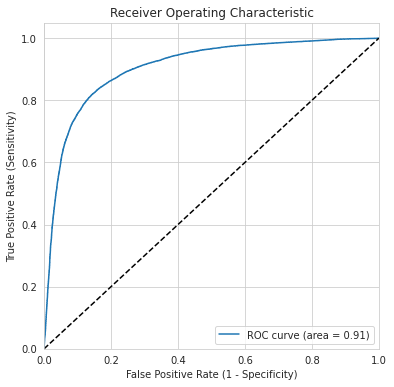

In [ ]:
# Ploting ROC curve
fpr, tpr, thresholds= roc_curve(y_train_pred.churn, y_train_pred.pred_churn, drop_intermediate = False )
roc_plot(y_train_pred.churn, y_train_pred.prob)

### Finding Optimal Probability Cutoff Point


In [247]:
# Creating different label columns using different probability cutoffs
num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred[i]=  y_train_pred.prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,prob,pred_churn,churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.061361,0,0,1,0,0,0,0,0,0,0,0,0
1,0.246224,0,0,1,1,1,0,0,0,0,0,0,0
2,0.094135,0,0,1,0,0,0,0,0,0,0,0,0
3,0.003579,0,0,1,0,0,0,0,0,0,0,0,0
4,0.408846,0,0,1,1,1,1,1,0,0,0,0,0


In [248]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.churn, y_pred= y_train_pred[n]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    plot_df.loc[n]= [n,accuracy,sensitivity,specificity]
    
plot_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.691835,0.977108,0.406561
0.2,0.2,0.761265,0.953748,0.568781
0.3,0.3,0.798718,0.923277,0.674159
0.4,0.4,0.824310,0.889483,0.759136
0.5,0.5,0.835341,0.846397,0.824284
0.6,0.6,0.835470,0.794902,0.876038
0.7,0.7,0.822415,0.730845,0.913985
0.8,0.8,0.784417,0.621678,0.947155
0.9,0.9,0.641274,0.300405,0.982143


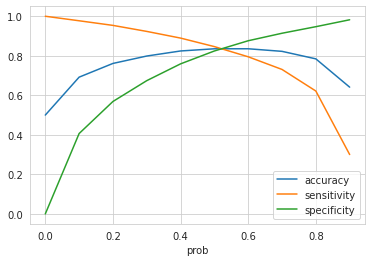

In [249]:
# Ploting Accuracy, Sensitivity and Specificity for different probability cutoffs

plot_df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.show()

### Final Logistic Regression Summary


In [250]:
print(lreg_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38511
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15314.
Date:                Wed, 03 Nov 2021   Deviance:                       30629.
Time:                        15:57:16   Pearson chi2:                 7.12e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3107      0

In [251]:
# Evaluating on Testing dataset
final_cols= X_train_final.columns.tolist()
final_cols.remove('const')
X_test_final= X_test[final_cols]
X_test_final= sm.add_constant(X_test_final) # Adding constraints
y_test_pred= pd.DataFrame(lreg_model_5.predict(X_test_final), columns=['prob'])
y_test_pred['pred_churn']= y_test_pred.prob.map(lambda x: 1 if x > 0.5 else 0) # Setting decision margin at .5
y_test_pred= y_test_pred.merge(pd.DataFrame(y_test, columns= ['churn']), how= 'inner', left_index= True, right_index= True)
lr_final_cl_report_test= classification_report(y_true= y_test_pred.churn, y_pred= y_test_pred.pred_churn)
print('Classification Report on Testing Dataset:\n', lr_final_cl_report_test)

Classification Report on Testing Dataset:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8256
           1       0.28      0.81      0.41       730

    accuracy                           0.81      8986
   macro avg       0.63      0.81      0.65      8986
weighted avg       0.92      0.81      0.85      8986



## Performing PCA

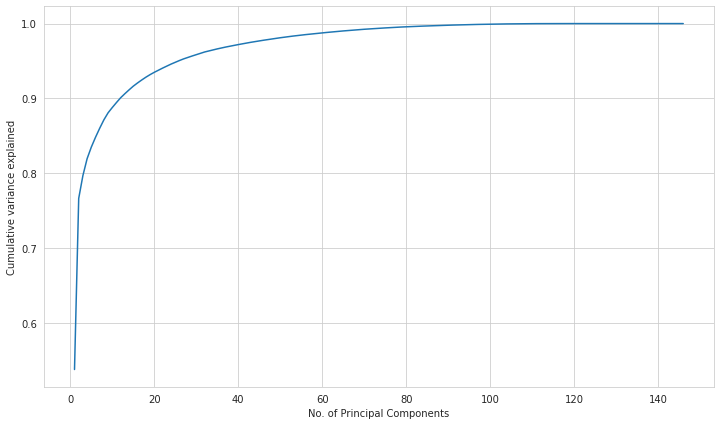

In [252]:
# Performing PCA and scree plot
pca= PCA(random_state= 42)
pca.fit(X_train_sm)
plt.figure(figsize= [12,7])
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative variance explained')
plt.show()

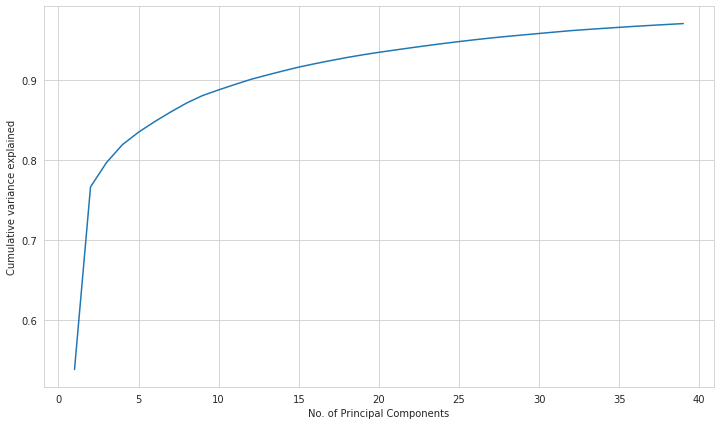

In [253]:
# Checking no. of components required to explain 97% variance
pca= PCA(.97, random_state= 42)
pca.fit(X_train_sm)
plt.figure(figsize= [12,7])
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative variance explained')
plt.show()

39 principal components can explain 97% variance in traininging dataset.

In [254]:
# Transforming training and tetsing dataset
X_train_pc= pca.transform(X_train_sm)
X_test_pc= pca.transform(X_test)

In [255]:
# Shape of new test and train dataset
X_train_pc.shape, X_test_pc.shape

((38528, 39), (8986, 39))

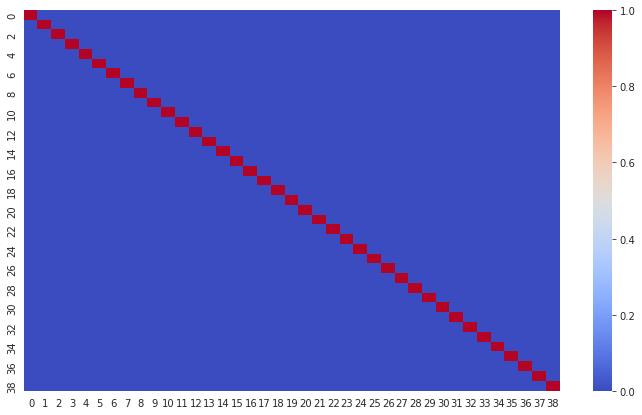

In [256]:
# Checking correlation coefficients of principal components
plt.figure(figsize= (12,7))
sns.heatmap(pd.DataFrame(X_train_pc).corr(), cmap= 'coolwarm')
plt.show()

## 2. Random Forest Classifier

In [257]:
# Using Random Forest Classifier
rfc= RandomForestClassifier(random_state= 42)
rfc.fit(X_train_pc, y_train_sm)
y_train_pred= rfc.predict(X_train_pc)
y_test_pred= rfc.predict(X_test_pc)

In [258]:
# Classification report on training dataset
print(classification_report(y_train_sm, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00     19264

    accuracy                           1.00     38528
   macro avg       1.00      1.00      1.00     38528
weighted avg       1.00      1.00      1.00     38528



In [259]:
# Classification report on testing dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8256
           1       0.44      0.60      0.51       730

    accuracy                           0.90      8986
   macro avg       0.70      0.76      0.73      8986
weighted avg       0.92      0.90      0.91      8986



### Random Forest- Hyperparameter tunning

In [ ]:
# Performing GridSearchCV
rfc= RandomForestClassifier(random_state= 42)
param_grid= { 'n_estimators': [100, 200, 300, 500],
             'max_depth': [4, 5, 9, 12, 15],
             'min_samples_leaf': [15, 20, 25]
             }
gcv_rfc= GridSearchCV(estimator= rfc, param_grid= param_grid, cv= 3, scoring= 'recall', n_jobs= -1, return_train_score= True, verbose= 1)
gcv_rfc_fit= gcv_rfc.fit(X_train_pc, y_train_sm)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 22.6min finished


In [ ]:
# Checking best parameters
gcv_rfc_fit.best_params_

{'max_depth': 15, 'min_samples_leaf': 15, 'n_estimators': 500}

In [ ]:
# Storing CV result
rfcv_df= pd.DataFrame(gcv_rfc_fit.cv_results_)
#joblib.dump(rfcv_df, '/content/drive/MyDrive/colab_data/rfcv_df.pkl')
#rfcv_df= joblib.load('/content/drive/MyDrive/colab_data/rfcv_df.pkl')
rfcv_df.sort_values('mean_train_score', ascending= False).head(100) # Displaying top 100

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
48,14.016037,0.142551,0.218819,0.008282,15,15,100,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.865037,0.878113,0.887609,0.876920,0.009253,2,0.926915,0.925592,0.926681,0.926396,0.000577
49,28.254259,0.053497,0.429154,0.014635,15,15,200,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.864882,0.877958,0.886052,0.876297,0.008722,3,0.926681,0.925592,0.926681,0.926318,0.000514
51,70.148411,0.162684,1.033500,0.026075,15,15,500,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.864882,0.878425,0.888543,0.877283,0.009693,1,0.925514,0.926136,0.926837,0.926162,0.000540
50,42.347175,0.083870,0.625415,0.024131,15,15,300,"{'max_depth': 15, 'min_samples_leaf': 15, 'n_e...",0.862080,0.878269,0.886675,0.875675,0.010207,4,0.925981,0.925903,0.926526,0.926136,0.000277
39,67.170846,0.298803,1.000725,0.030426,12,15,500,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.850872,0.869085,0.878113,0.866023,0.011330,7,0.913294,0.912049,0.913839,0.913060,0.000749
36,13.520875,0.124327,0.194811,0.000656,12,15,100,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.855230,0.868618,0.876401,0.866750,0.008743,5,0.915395,0.911192,0.912593,0.913060,0.001747
37,26.420143,0.045961,0.389257,0.010618,12,15,200,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.854296,0.868618,0.875778,0.866231,0.008931,6,0.912905,0.911659,0.913605,0.912723,0.000805
38,39.897761,0.098425,0.591277,0.017785,12,15,300,"{'max_depth': 12, 'min_samples_leaf': 15, 'n_e...",0.851650,0.868306,0.876712,0.865556,0.010415,8,0.911893,0.911115,0.912827,0.911945,0.000700
53,27.267654,0.071423,0.414066,0.024682,15,20,200,"{'max_depth': 15, 'min_samples_leaf': 20, 'n_e...",0.848692,0.864103,0.873132,0.861976,0.010090,11,0.905588,0.905978,0.905744,0.905770,0.000160
54,41.184572,0.232861,0.616965,0.015080,15,20,300,"{'max_depth': 15, 'min_samples_leaf': 20, 'n_e...",0.849315,0.864882,0.872665,0.862287,0.009707,10,0.904732,0.906055,0.905900,0.905562,0.000590


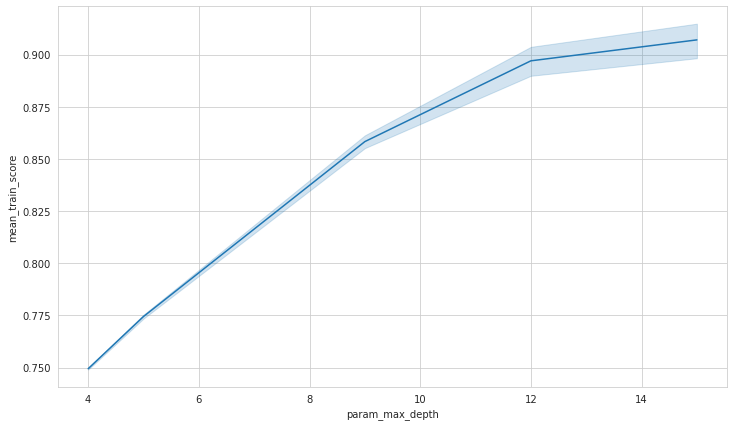

In [ ]:
# Plotting param_max_depth vs mean_train_score (mean of cross validation accuracy)
plt.figure(figsize= (12,7))
sns.lineplot(data= rfcv_df, x= 'param_max_depth', y= 'mean_train_score' )
plt.show()

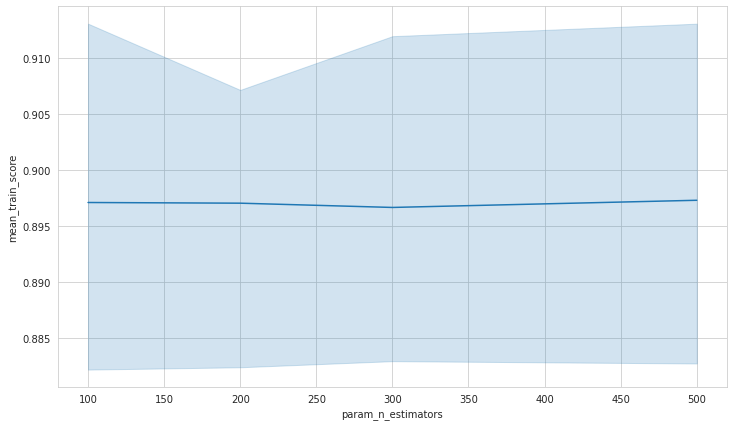

In [ ]:
# Plotting param_max_depth vs mean_train_score (mean of cross validation recall) for param_max_depth= 12
plt.figure(figsize= (12,7))
sns.lineplot(data= rfcv_df[(rfcv_df.param_max_depth == 12)], x= 'param_n_estimators', y= 'mean_train_score' )
plt.show()

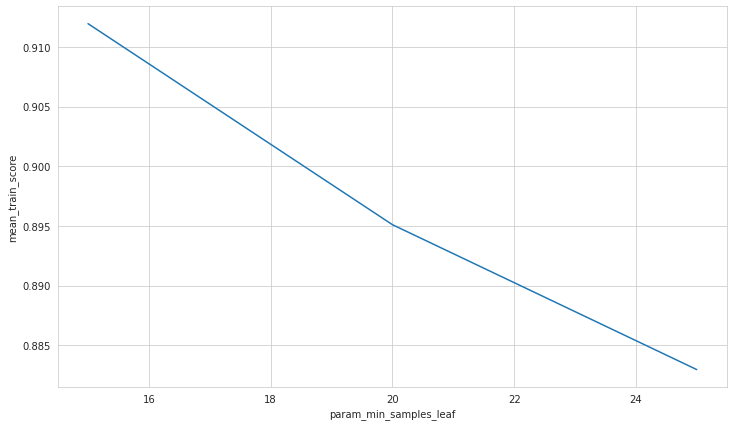

In [ ]:
# Plotting param_max_depth vs mean_train_score (mean of cross validation accuracy) for param_max_depth= 15
plt.figure(figsize= (12,7))
sns.lineplot(data= rfcv_df[(rfcv_df.param_max_depth == 12) & (rfcv_df.param_n_estimators== 300)], x= 'param_min_samples_leaf', y= 'mean_train_score' )
plt.show()

In [260]:
# Building Random Forest model with above parameters
rfc= RandomForestClassifier(n_estimators= 300, max_depth= 12, min_samples_leaf= 15, random_state= 42)
rfc.fit(X_train_pc, y_train_sm)
y_train_pred= rfc.predict(X_train_pc)
y_test_pred= rfc.predict(X_test_pc)
print('Accuracy on trining data:' ,accuracy_score(y_train_sm, y_train_pred))
print('Accuracy on testing data:' ,accuracy_score(y_test, y_test_pred))

Accuracy on trining data: 0.9270660299003323
Accuracy on testing data: 0.8791453371911863


In [261]:
# Classification report on training dataset
print('Accuracy on testing data: \n' ,classification_report(y_train_sm, y_train_pred))

Accuracy on testing data: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     19264
           1       0.92      0.94      0.93     19264

    accuracy                           0.93     38528
   macro avg       0.93      0.93      0.93     38528
weighted avg       0.93      0.93      0.93     38528



In [262]:
# Classification report on testing dataset
rfc_final_cl_report_test= classification_report(y_test, y_test_pred)
print('Accuracy on testing data: \n' ,rfc_final_cl_report_test)

Accuracy on testing data: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8256
           1       0.37      0.72      0.49       730

    accuracy                           0.88      8986
   macro avg       0.67      0.80      0.71      8986
weighted avg       0.92      0.88      0.90      8986



## XGBoost Classifier

In [263]:
# Using XGBoost Classifier
xgbcl= XGBClassifier(random_state= 42)
xgbcl.fit(X_train_pc, y_train_sm)
y_train_pred= xgbcl.predict(X_train_pc)
y_test_pred= xgbcl.predict(X_test_pc)
print('Accuracy on trining data:' ,accuracy_score(y_train_sm, y_train_pred))
print('Accuracy on testing data:' ,accuracy_score(y_test, y_test_pred))

Accuracy on trining data: 0.8565199335548173
Accuracy on testing data: 0.8371911862897841


In [264]:
# Classification report on training dataset
print('Accuracy on testing data: \n' ,classification_report(y_train_sm, y_train_pred))

Accuracy on testing data: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     19264
           1       0.85      0.86      0.86     19264

    accuracy                           0.86     38528
   macro avg       0.86      0.86      0.86     38528
weighted avg       0.86      0.86      0.86     38528



In [265]:
# Classification report on testing dataset
print('Accuracy on testing data: \n' ,classification_report(y_test, y_test_pred))

Accuracy on testing data: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      8256
           1       0.30      0.77      0.43       730

    accuracy                           0.84      8986
   macro avg       0.64      0.81      0.67      8986
weighted avg       0.92      0.84      0.87      8986



### XGBoost Classifier - Hyperparameter tunning

In [ ]:
# Param grid
param_grid= {'n_estimators': [100, 200, 300, 500],
        'gamma': [.5, .7, 1],
        'subsample': [.6,.9, 1],
        'colsample_bytree': [.6, .9, 1],
        'max_depth': [4, 6, 8, 9],
        'learning_rate': [.01, .05, .1, .5]
        }

In [ ]:
# Performing GridSearchCV
xgbcl= XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state= 42)
gcv_xgbcl= GridSearchCV(estimator= xgbcl, param_grid= param_grid, cv= 3, verbose=3, n_jobs= -1, scoring= 'recall', return_train_score= True)
gcv_xgbcl_fit= gcv_xgbcl.fit(X_train_pc, y_train_sm)

# Storing CV result
xgbcl_df= pd.DataFrame(gcv_xgbcl_fit.cv_results_)
#joblib.dump(xgbcl_df, '/content/drive/MyDrive/colab_data/xgbcl_df.pkl')

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 97.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 127.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 160.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 196.5min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 236.1min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 278.1min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 312.8min finished


['/content/drive/MyDrive/colab_data/xgbcl_df.pkl']

In [ ]:
# Loading stores result
#xgbcl_df= joblib.load('/content/drive/MyDrive/colab_data/xgbcl_df.pkl')

In [ ]:
# Best estimator
gcv_xgbcl_fit.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic',
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

In [ ]:
# Checking CV result
xgbcl_df.sort_values('mean_train_score', ascending= False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1727,13.701613,3.745591,0.014704,0.002725,1,1,0.5,9,500,1,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.968867,0.973381,0.975405,0.972551,0.002733,28,1.000000,1.000000,1.000000,1.000000,0.000000
1629,45.034440,0.877254,0.019355,0.000525,1,1,0.05,9,500,0.6,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.964041,0.970735,0.973070,0.969282,0.003826,187,1.000000,1.000000,1.000000,1.000000,0.000000
738,8.477763,0.084547,0.017171,0.002336,0.9,0.5,0.5,6,300,0.6,"{'colsample_bytree': 0.9, 'gamma': 0.5, 'learn...",0.958126,0.964508,0.967621,0.963418,0.003952,463,1.000000,1.000000,1.000000,1.000000,0.000000
739,8.615278,0.137396,0.015573,0.000768,0.9,0.5,0.5,6,300,0.9,"{'colsample_bytree': 0.9, 'gamma': 0.5, 'learn...",0.966999,0.969956,0.971202,0.969386,0.001763,175,1.000000,1.000000,1.000000,1.000000,0.000000
740,8.353602,0.167968,0.016557,0.000928,0.9,0.5,0.5,6,300,1,"{'colsample_bytree': 0.9, 'gamma': 0.5, 'learn...",0.962951,0.969801,0.971357,0.968037,0.003651,265,1.000000,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1.835861,0.360892,0.014719,0.000950,0.6,0.5,0.01,4,100,0.9,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'learn...",0.765411,0.771638,0.781445,0.772831,0.006600,1717,0.784091,0.780277,0.774440,0.779603,0.003969
385,1.344129,0.029467,0.015079,0.000730,0.6,1,0.01,4,100,0.9,"{'colsample_bytree': 0.6, 'gamma': 1, 'learnin...",0.765411,0.771638,0.781445,0.772831,0.006600,1717,0.784091,0.780277,0.774440,0.779603,0.003969
1346,1.392207,0.054927,0.015136,0.001288,1,0.7,0.01,4,100,1,"{'colsample_bytree': 1, 'gamma': 0.7, 'learnin...",0.763387,0.761364,0.784558,0.769770,0.010489,1726,0.782923,0.773350,0.775374,0.777216,0.004120
1538,1.363873,0.030980,0.014979,0.001027,1,1,0.01,4,100,1,"{'colsample_bytree': 1, 'gamma': 1, 'learning_...",0.763387,0.761364,0.784558,0.769770,0.010489,1726,0.782923,0.773350,0.775374,0.777216,0.004120


In [ ]:
# Checking best parameter from cv result
xgbcl_df.sort_values('mean_train_score', ascending= False).loc[1727, 'params']

{'colsample_bytree': 1,
 'gamma': 1,
 'learning_rate': 0.5,
 'max_depth': 9,
 'n_estimators': 500,
 'subsample': 1}

In [266]:
# Using XGBoost Classifier
xgbcl= XGBClassifier(booster='gbtree',colsample_bytree= 1, subsample= 1, gamma= 1,  learning_rate= 0.5, max_depth= 9, n_estimators= 500, n_jobs= -1,
              random_state=42, verbosity=1)
xgbcl.fit(X_train_pc, y_train_sm)
y_train_pred= xgbcl.predict(X_train_pc)
y_test_pred= xgbcl.predict(X_test_pc)
print('Accuracy on trining data:' ,accuracy_score(y_train_sm, y_train_pred))
print('Accuracy on testing data:' ,accuracy_score(y_test, y_test_pred))

Accuracy on trining data: 1.0
Accuracy on testing data: 0.8961718228355219


In [267]:
# Classification report on training dataset
print('Accuracy on testing data: \n' ,classification_report(y_train_sm, y_train_pred))

Accuracy on testing data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19264
           1       1.00      1.00      1.00     19264

    accuracy                           1.00     38528
   macro avg       1.00      1.00      1.00     38528
weighted avg       1.00      1.00      1.00     38528



In [268]:
# Classification report on testing dataset
xgbc_final_cl_report_test= classification_report(y_test, y_test_pred)
print('Accuracy on testing data: \n' ,xgbc_final_cl_report_test)

Accuracy on testing data: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      8256
           1       0.40      0.58      0.48       730

    accuracy                           0.90      8986
   macro avg       0.68      0.75      0.71      8986
weighted avg       0.92      0.90      0.90      8986



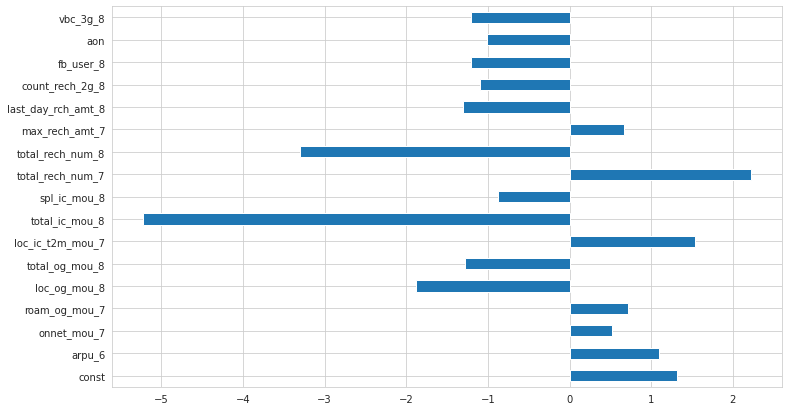

In [ ]:
# Plotting important features with beta coefficients values
plt.figure(figsize= (12,7))
lreg_model_5.params.plot(kind= 'barh')
plt.show()

In [272]:
# Classifical report of our final logistic regression model
print(lr_final_cl_report_test)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8256
           1       0.28      0.81      0.41       730

    accuracy                           0.81      8986
   macro avg       0.63      0.81      0.65      8986
weighted avg       0.92      0.81      0.85      8986



In [269]:
# Printing classification report
print(rfc_final_cl_report_test)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8256
           1       0.37      0.72      0.49       730

    accuracy                           0.88      8986
   macro avg       0.67      0.80      0.71      8986
weighted avg       0.92      0.88      0.90      8986



In [270]:
# Printing classification report
print(xgbc_final_cl_report_test)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8256
           1       0.40      0.58      0.48       730

    accuracy                           0.90      8986
   macro avg       0.68      0.75      0.71      8986
weighted avg       0.92      0.90      0.90      8986

